# **Project Name**    -A Predictive Model for Financial Fraud Detection



# **Project Summary -**

This project focuses on building a Fraud Detection System using a real-world financial transaction dataset consisting of around 6 lakh rows. Due to computational limitations, a sample of the dataset was used for analysis and modeling.

**The project involved:**

- **Data Exploration & Visualization**: Identified key patterns in fraud cases such as higher occurrence in TRANSFER and CASH_OUT transactions, preference for corporate accounts, and a higher frequency during night hours.

- **Feature Engineering**: Created new features like Amount to Balance Ratio, Origin/Destination Balance Change, and Hour Category to enhance model performance.

- **Model Building**: Trained and compared the performance of four machine learning models:

      Logistic Regression

      Decision Tree Classifier

      Random Forest Classifier

      AdaBoost Classifier



Additionally, the project was extended to a Streamlit web application where users can input transaction details to predict fraud likelihood in real-time, with a visually appealing dark-themed interface.

This end-to-end pipeline from EDA to deployment makes the solution practical for financial institutions to detect fraud effectively.

# **GitHub Link -**

https://github.com/abhinavnautiyalDS/A-Predictive-Model-for-Financial-Fraud-Detection

# **Problem Statement**
In the financial sector, fraudulent transactions pose a significant threat, leading to substantial monetary losses and erosion of trust. The challenge is to develop a robust machine learning model that can accurately identify fraudulent transactions in a highly imbalanced dataset containing millions of records.

The objective of this project is to:

Detect and predict fraudulent financial transactions in real-time based on transaction patterns and account behaviors, by leveraging data-driven insights and machine learning models.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:

import numpy as np
import pandas as pd

# FOR Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # For handling class imbalance (install imbalanced-learn if needed)

# For Models Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # You can replace this with LightGBM if preferred

#  Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

# For deployment
import joblib

# ⚠️ Warnings
import warnings
warnings.filterwarnings('ignore')  # Optional: to ignore warnings during development


### Dataset Loading

In [ ]:
og=pd.read_csv("/content/Fraud.csv")

df=og.copy()

### Dataset First View

In [ ]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [ ]:
df.tail()

step      type      amount     nameOrig  oldbalanceOrg  \
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0

In [ ]:
df.sample()

step     type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
5353303   375  PAYMENT  10902.79  C1938311336       78590.01        67687.22   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
5353303  M1208512308             0.0             0.0        0               0

### Dataset Rows & Columns count

In [ ]:
print("No of Rows ",df.shape[0]," and columns ",df.shape[1])

No of Rows  6362620  and columns  11


### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

**No duplicate rows are Present**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**There are no missing values**

## ***2. Understanding Your Variables***

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

### Variables Description

- **step**: Represents a unit of time in the real world. In this dataset, 1 step equals 1 hour. The total number of steps is 744, representing a 30-day simulation.

- **type**: Indicates the type of transaction. Possible values are: CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.

- **amount**: The monetary value of the transaction in local currency.

- **nameOrig**: The customer who initiated the transaction.

- **oldbalanceOrg**: The sender's account balance before the transaction.

- **newbalanceOrig**: The sender's account balance after the transaction.

- **nameDest**: The customer who received the transaction.

- **oldbalanceDest**: The recipient’s account balance before the transaction.
Note: For recipients with names starting with "M" (Merchants), this information is not available.

- **newbalanceDest**: The recipient’s account balance after the transaction.
Note: For recipients with names starting with "M" (Merchants), this information is also not available.

- **isFraud**: Indicates whether the transaction was fraudulent. In this dataset, fraudulent agents attempt to take control of customer accounts and drain the funds by transferring them to another account and then cashing out.

- **isFlaggedFraud**: Identifies transactions flagged by the system for suspicious behavior. Specifically, any attempt to transfer more than 200,000 in a single transaction is flagged as potentially illegal.



### Check Unique Values for each variable.

In [ ]:
def unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print()

unique_values(df)

Unique values in column 'step':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 23

**There are no inconsistencies in the unique values of any column**

## 3. ***Data Wrangling***

In [ ]:
#checking outlier values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

Numeric Columns: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


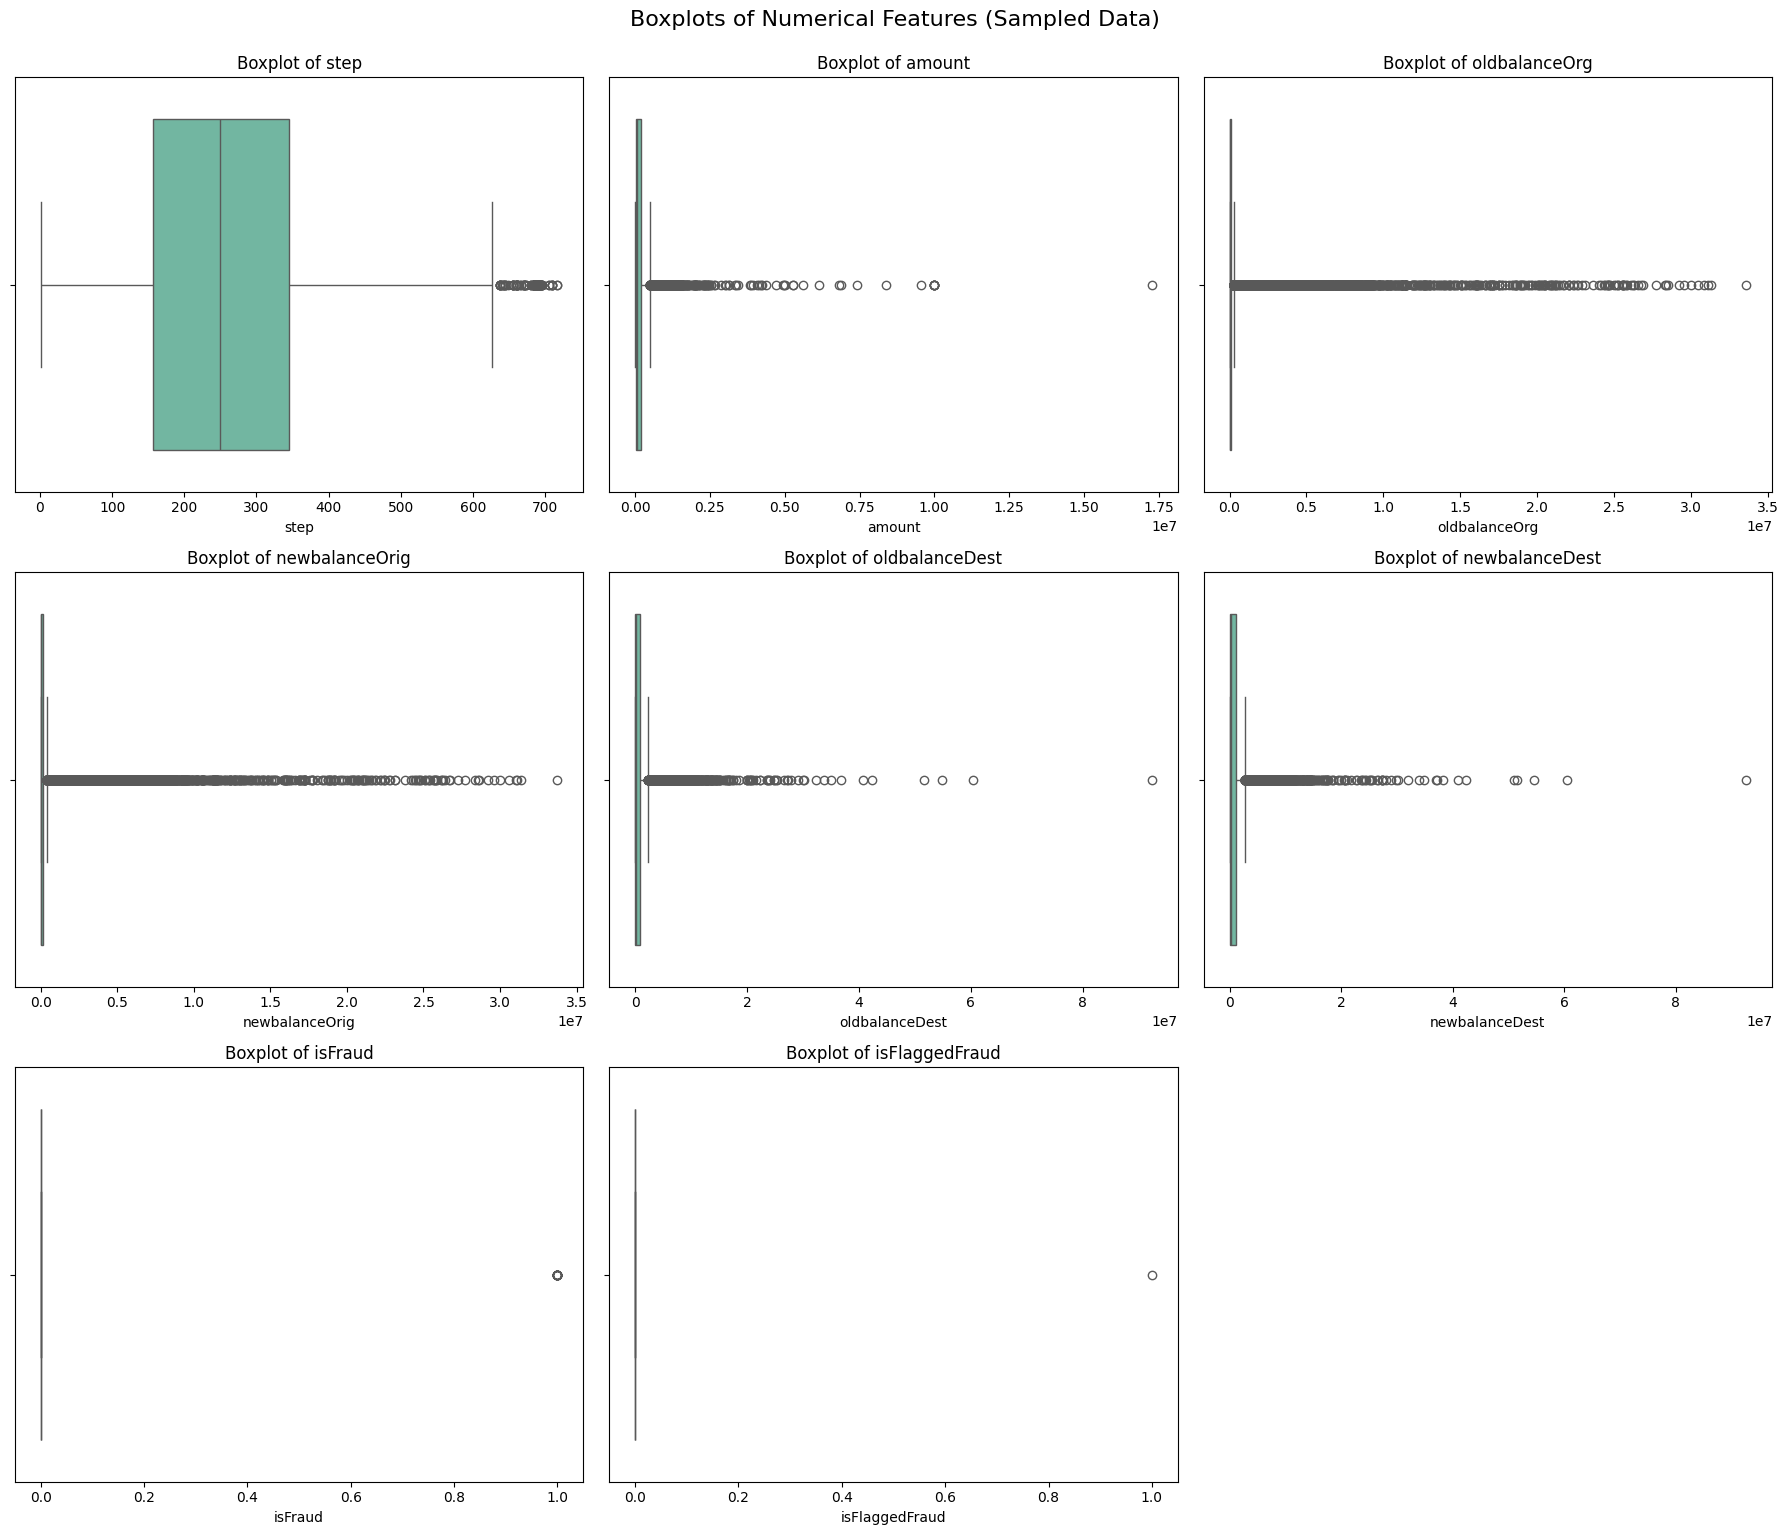

In [ ]:


# Detect numeric columns
num_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]

print("Numeric Columns:", num_cols)

# Optional: Sample the dataset for speed
df_sample = df.sample(10000, random_state=42)  # sample 10k rows

# Define subplot grid size dynamically
cols = 3
rows = int(np.ceil(len(num_cols) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(num_cols):
    sns.boxplot(x=df_sample[column], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)

# Remove any unused axes
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features (Sampled Data)', fontsize=16, y=1.02)
plt.show()


#### Insights

- Most transactions are small or medium, but there are some huge outliers. This could mean big transfers are happening, which might be linked to fraudsters moving big sums.

- The sender’s account balances are usually in a normal range, but there are some super high or low outliers. This might show accounts getting loaded up or drained, a possible fraud sign.

- For recipients, balances are mostly missing (especially for merchants), but where we have data, there are big jumps with outliers. This could mean some accounts suddenly get a lot of money, maybe from shady transfer

- Fraud (isFraud) and big transfer flags (isFlaggedFraud) are rare, mostly zeros. But those few ‘1’s stand out, especially with flags for transfers over 200,000. Not all big moves get flagged, so the system might miss some

### Data Wrangling Code

In [ ]:
#converting steps in hour format

df['Hour_of_day']=df['step']%24

Here, I created a new column **Hour_of_day** by taking the modulos of the step column with 24. Since each step in the dataset represents one hour, taking step % 24 converts the continuous step count into a 24-hour clock format (0 to 23). This helps me understand the specific hour of the day when the transaction occurred, so I can analyze whether fraud is more likely to happen during certain times of the day

In [ ]:

df['Orig_Type']=df['nameOrig'].str[0]
df['Dest_Type']=df['nameDest'].str[0]

Here, I extracted the first character from the **nameOrig** and **nameDest** columns to create two new columns: **Orig_Type** and **Dest_Type**. I did this because the first character indicates the type of account — like 'C' for customer and 'M' for merchant. By capturing this, I can later analyze whether transactions from specific account types are more likely to be fraudulent. This gives me an additional categorical feature that can help improve the model's understanding and prediction of fraud

In [ ]:
df['org_balance_change'] = (df['oldbalanceOrg'] - df['newbalanceOrig']).astype(int)
df['dest_balance_change'] = (df['oldbalanceDest'] - df['newbalanceDest']).astype(int)

Here, I calculated two new columns: **org_balance_change** and **dest_balance_change**.

For org_balance_change, I subtracted **newbalanceOrig** from **oldbalanceOrg** to find out how much the origin account balance has changed after the transaction. Similarly, for **dest_balance_change**, I subtracted **newbalanceDest** from **oldbalanceDest** to calculate the balance change for the destination account.


In [ ]:
df['AmountToBalanceRatio_Orig'] = round((df['amount'] / (df['oldbalanceOrg'] + 1)), 2)


Here, I created a new column **AmountToBalanceRatio_Orig** by dividing the **amount** of the transaction by the **oldbalanceOrg** (origin account's balance before the transaction), and added 1 to avoid division by zero. I then rounded the result to 2 decimal places.

This ratio helps me understand how significant the transaction amount is compared to the available balance. A high ratio (close to 1) might indicate that the user is trying to transfer or withdraw almost their entire balance, which could be a potential sign of fraud.

In [ ]:
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Hour_Category'] = df['Hour_of_day'].apply(categorize_hour)


Here, I defined a function **categorize_hour** to convert the **Hour_of_day** (which is in 0-23 format) into categorical time periods: Morning, Afternoon, Evening, and Night based on the hour.

Then, I applied this function on the Hour_of_day column to create a new column called Hour_Category. This helps me group transactions based on different times of the day to see if fraud is more common during a particular period, like Night or Morning.

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distrubution of Numerical columns

Numerical Columns: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'Hour_of_day', 'org_balance_change', 'dest_balance_change', 'AmountToBalanceRatio_Orig']


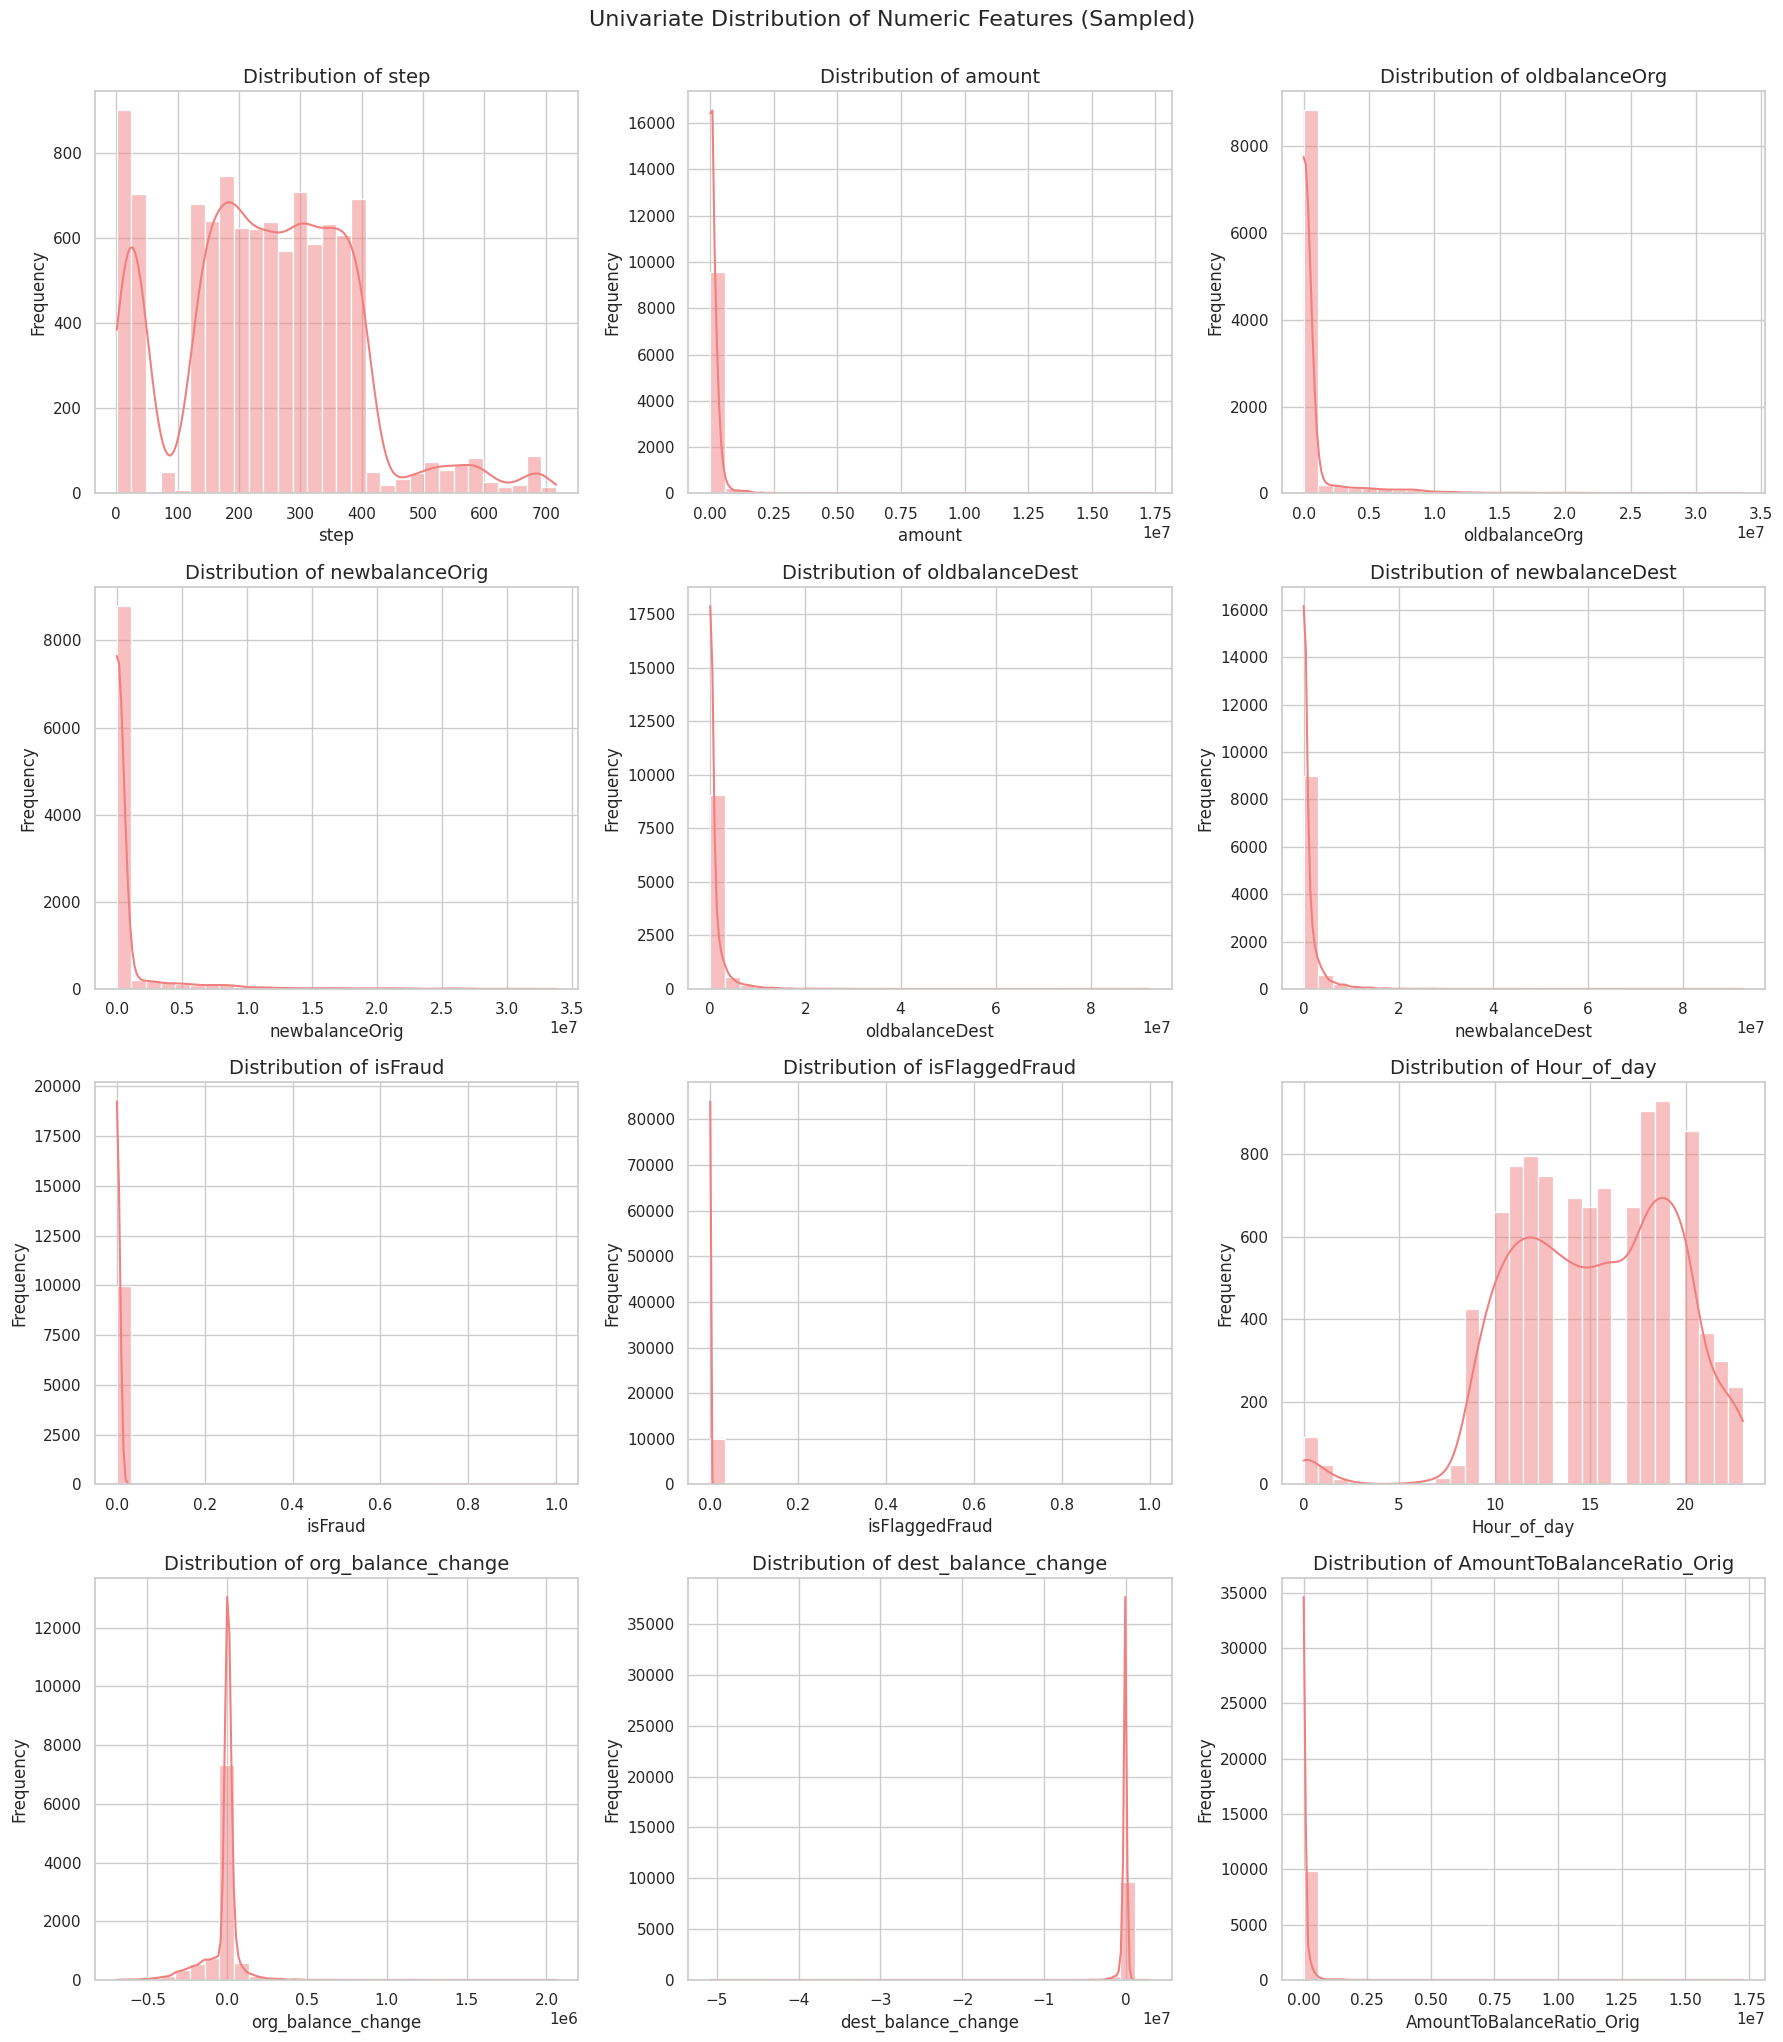

In [ ]:
num_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
print("Numerical Columns:", num_cols)

# Sample the dataset to speed up plotting
df_sample = df.sample(10000, random_state=42)

# Plot settings
sns.set(style="whitegrid")
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(18, 5 * n_rows))

for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df_sample[col], kde=True, bins=30, color='lightcoral')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Univariate Distribution of Numeric Features (Sampled)', fontsize=16, y=1.02)
plt.show()

##### Insights

- Most transactions involve small to medium amounts, but there are some rare, massive ones that stand out. This might mean big transfers are happening, possibly linked to fraudsters trying to move large sums quickly.

- The starting and ending balances for senders are usually low, with a few accounts having huge balances. This shows that while most people have modest accounts, some have a lot of money—or lose it fast, which could hint at fraudulent draining.

- Fraud (isFraud) and flags for big transfers (isFlaggedFraud) are super rare—almost all are zeros. But those few ‘1’s stick out, especially with flags for transfers over 200,000. It looks like the system catches some big moves, but not all, so it might miss some fraud.

- The change in sender and recipient balances is mostly zero or small, with rare big jumps or drops. This could mean most transactions are normal, but those big shifts might be where fraud happens—someone emptying an account or filling another.

- This ratio is usually tiny, meaning most transactions are a small fraction of the sender’s balance. But a few huge ratios pop up, suggesting some transactions are way bigger than the account should handle—another fraud red flag!

#### Chart - 2 Distribution of categorical column

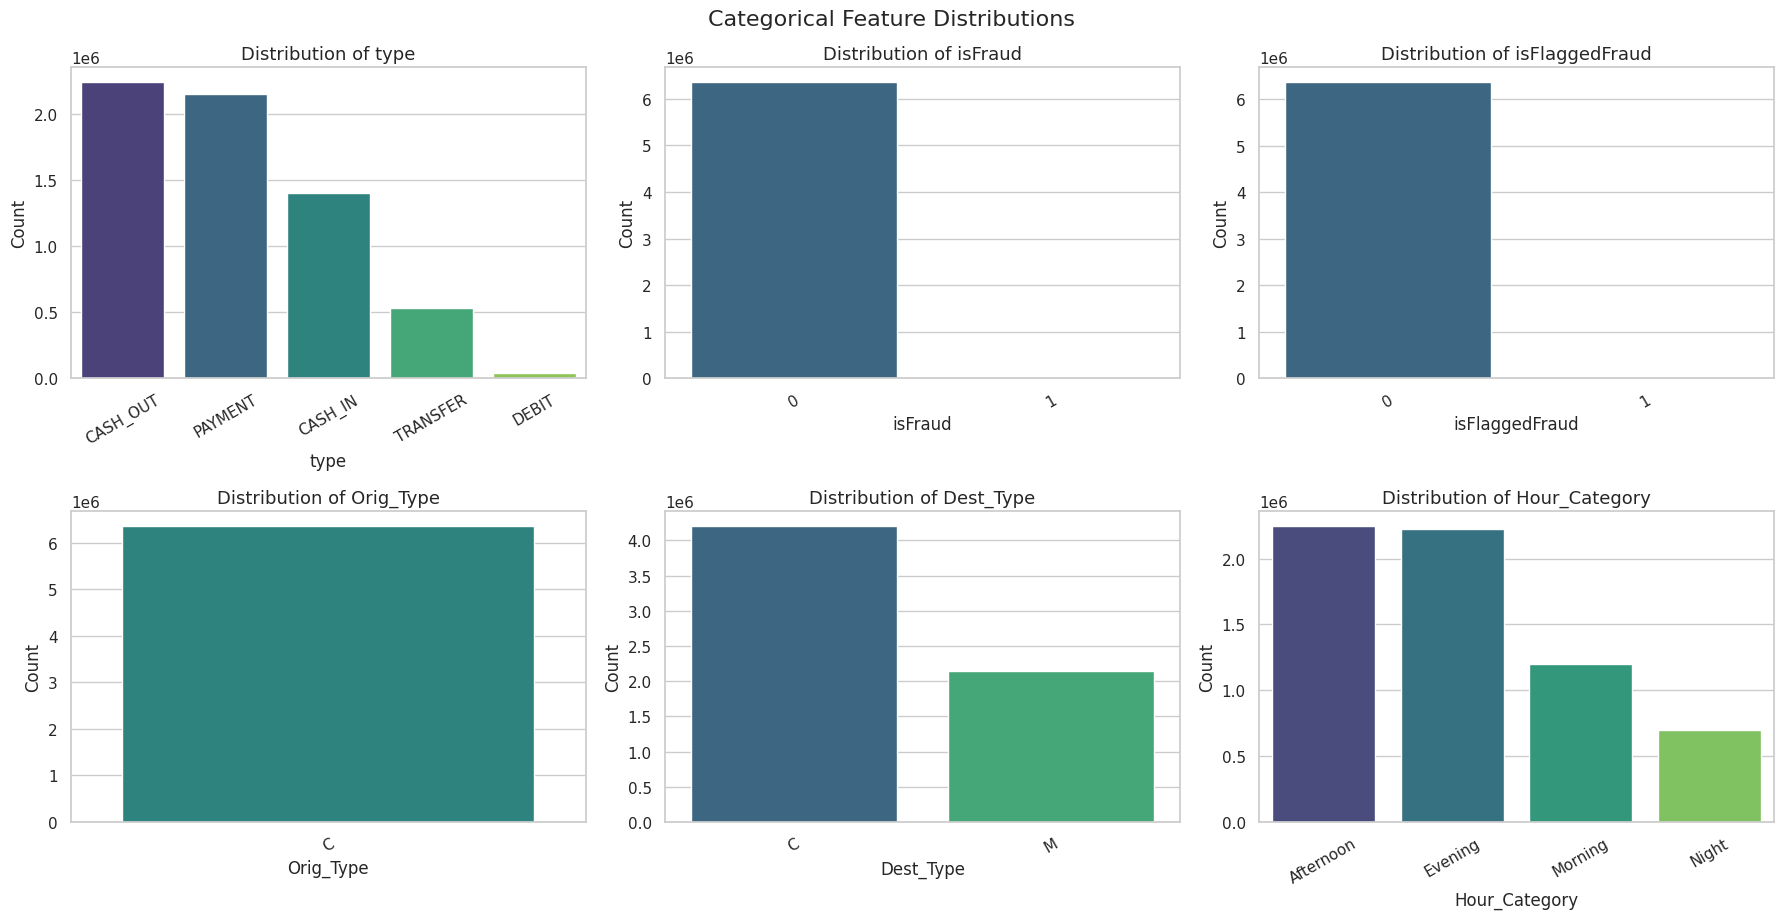

In [ ]:
cat_cols = ['type', 'isFraud', 'isFlaggedFraud', 'Orig_Type', 'Dest_Type', 'Hour_Category']

n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

plt.figure(figsize=(18, 4.5 * n_rows))
sns.set(style="whitegrid")

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, idx)

    # Use countplot directly (faster and internally optimized)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')

    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xticks(rotation=30)
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Categorical Feature Distributions', fontsize=16, y=1.02)
plt.show()

##### Insights

- Most transactions are CASH-OUT and PAYMENT, with TRANSFER and CASH-IN next, and DEBIT is the least common. This shows cash movements and payments dominate activity.

- Almost all transactions are non-fraudulent (0), with very few marked as fraudulent (1). Fraud is super rare here.

- Almost all senders are customers (C), with no significant merchant (M) activity. Customers drive most transactions.

- Most recipients are customers (C), but some are merchants (M), showing money often goes to both.

- Transactions peak in the Afternoon and Evening, with Morning next, and Night is the least busy. Activity follows daily patterns!

#### Chart - 3 Which Transaction Types are Most Common in Frauds?

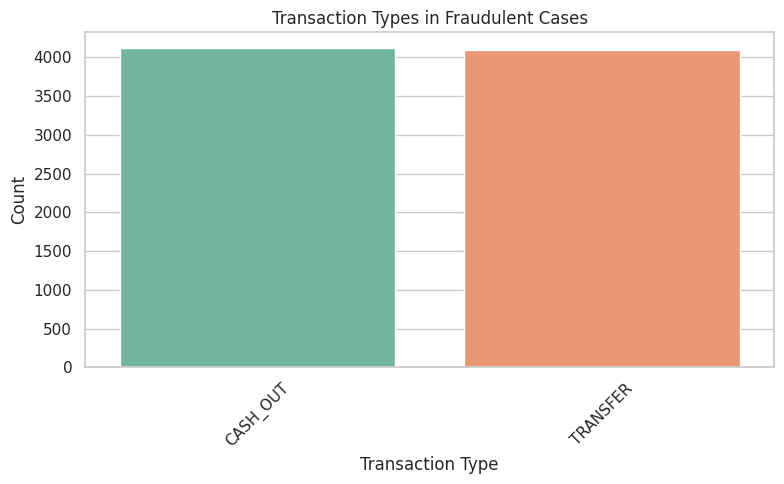

In [ ]:


fraud_df = df[df['isFraud'] == 1]

plt.figure(figsize=(8,5))
sns.countplot(data=fraud_df, x='type', order=fraud_df['type'].value_counts().index, palette='Set2')
plt.title('Transaction Types in Fraudulent Cases')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most fraudulent transactions are CASH-OUT and Transfer , with a count around 4000, showing fraudsters love to pull money out after taking control.

#### Chart - 4 When Do Frauds Occur Most Often? (Hour-wise)

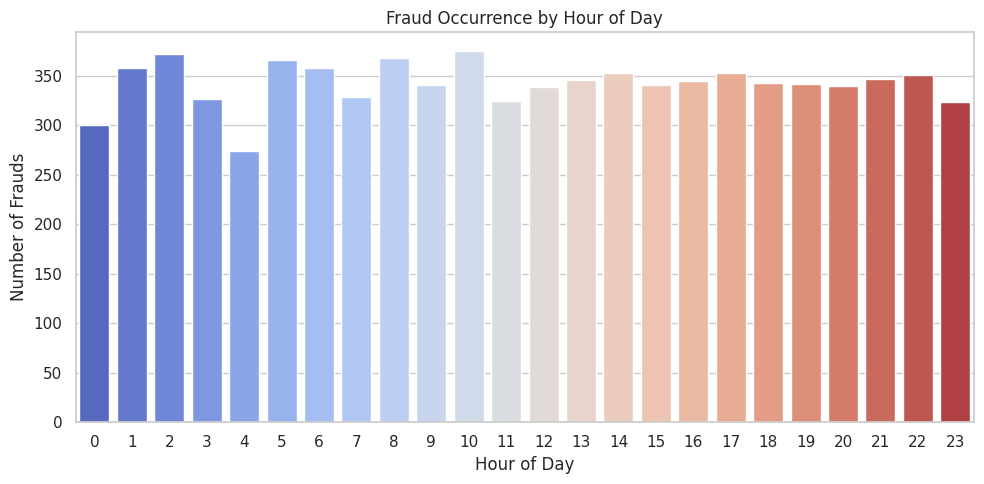

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=fraud_df, x='Hour_of_day', palette='coolwarm')
plt.title('Fraud Occurrence by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Frauds')
plt.tight_layout()
plt.show()


#### Chart - 5 . What Account Types Are Abused in Frauds?

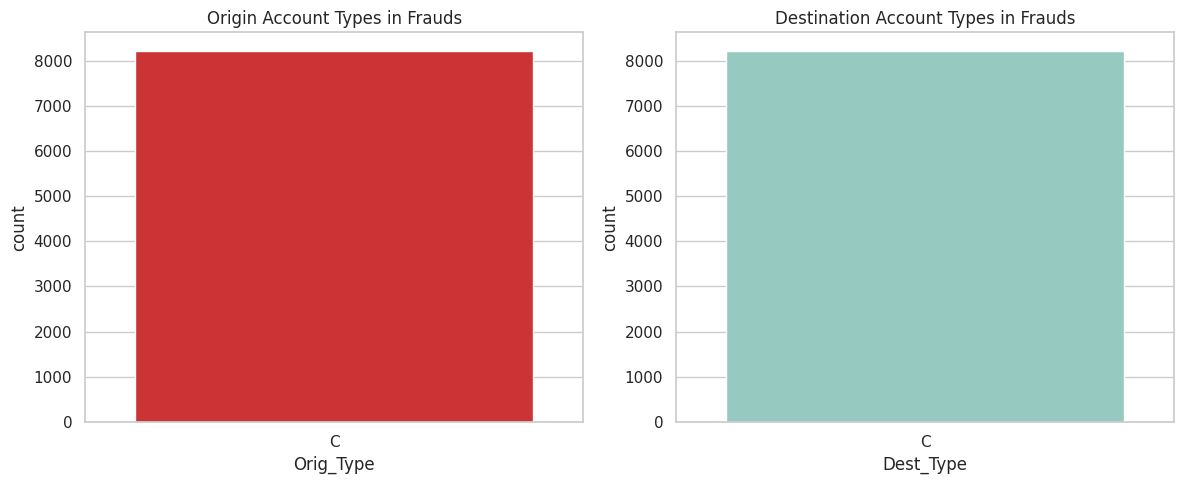

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(data=fraud_df, x='Orig_Type', palette='Set1', ax=axes[0])
axes[0].set_title('Origin Account Types in Frauds')
axes[0].set_xlabel('Orig_Type')

sns.countplot(data=fraud_df, x='Dest_Type', palette='Set3', ax=axes[1])
axes[1].set_title('Destination Account Types in Frauds')
axes[1].set_xlabel('Dest_Type')

plt.tight_layout()
plt.show()


This plot shows that in fraudulent transactions, both the Origin Account (Orig_Type) and Destination Account (Dest_Type) are mostly of type 'C', which represents Customer accounts.

It means that in the dataset, frauds are primarily happening between customer accounts rather than merchants (M). This insight helps in understanding the nature of fraud and can be valuable for building better fraud detection models focused on customer-to-customer transactions.

#### Chart - 6  How Much Money is Moved in Frauds?

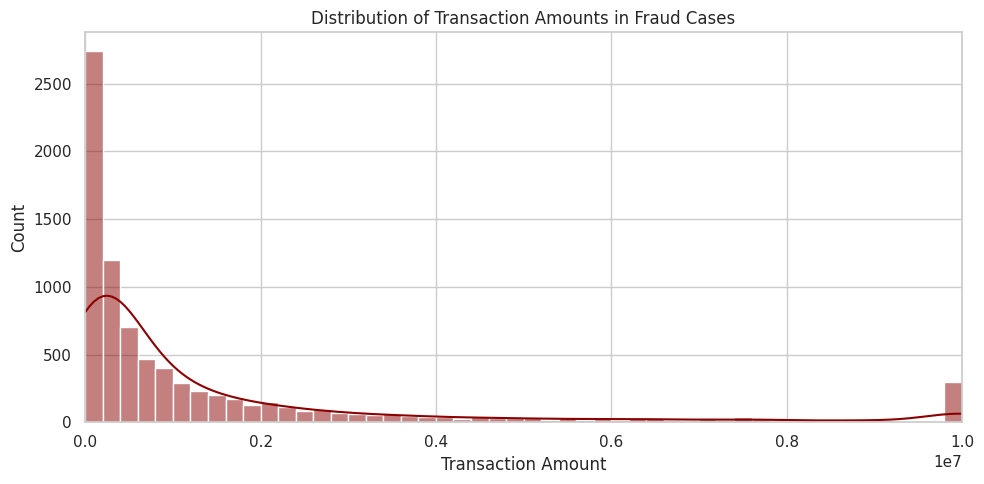

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(fraud_df['amount'], bins=50, kde=True, color='darkred')
plt.title('Distribution of Transaction Amounts in Fraud Cases')
plt.xlabel('Transaction Amount')
plt.xlim(0, fraud_df['amount'].quantile(0.99))  # Remove extreme outliers
plt.tight_layout()
plt.show()


This plot shows the distribution of transaction amounts specifically in fraud cases. Most fraudulent transactions involve smaller amounts, but there are a few high-value transactions nearing 10 million, which may indicate large-scale fraud attempts.

This insight suggests that while fraud can occur at any amount, fraud detection systems should be particularly attentive to both small frequent transactions and rare high-value transactions, as both are common in fraud patterns.

#### Chart - 7 What’s the Ratio of Amount to Origin Balance in Frauds?

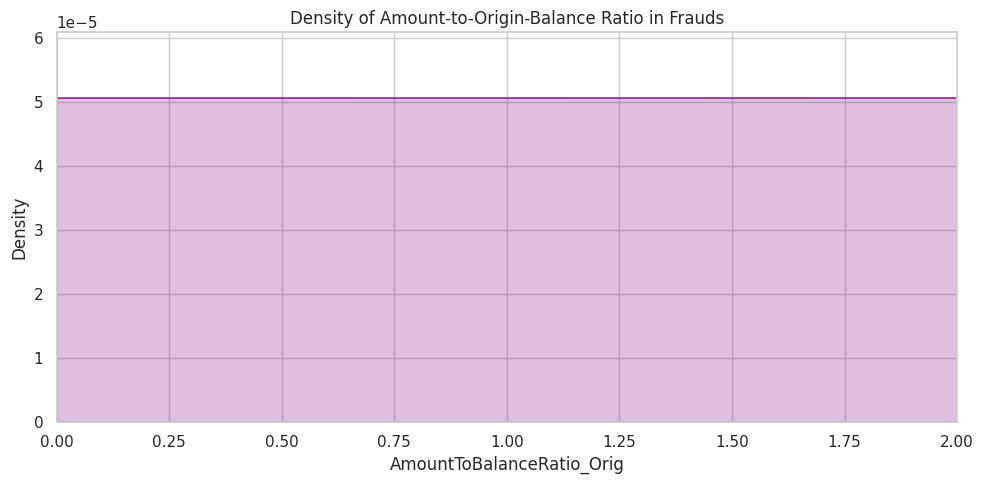

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=fraud_df, x='AmountToBalanceRatio_Orig', fill=True, color='purple')
plt.title('Density of Amount-to-Origin-Balance Ratio in Frauds')
plt.xlabel('AmountToBalanceRatio_Orig')
plt.xlim(0, 2)
plt.tight_layout()
plt.show()


#### Chart - 8  How Do Balances Change in Frauds?

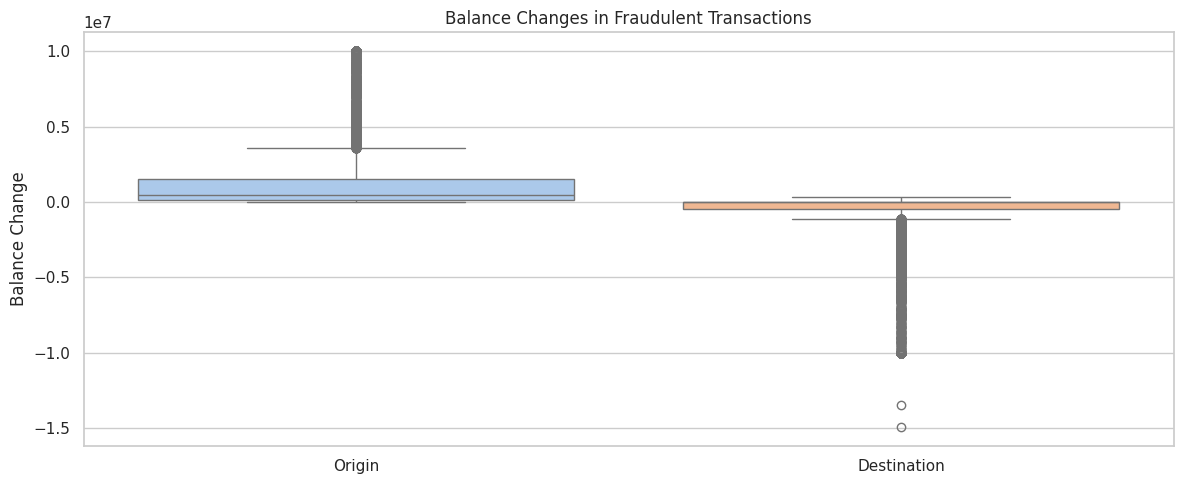

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12,5))

sns.boxplot(data=fraud_df[['org_balance_change', 'dest_balance_change']], palette='pastel')
plt.title('Balance Changes in Fraudulent Transactions')
plt.ylabel('Balance Change')
plt.xticks([0, 1], ['Origin', 'Destination'])

plt.tight_layout()
plt.show()


- **Origin**: Most fraudulent transactions cause a significant reduction in the origin balance, typically matching the transaction amount.

- **Destination**: The destination balance often shows a negative or negligible change, indicating that the credited balance may not reflect the transaction fully (e.g., immediate withdrawal, intermediary accounts).


This pattern helps flag transactions where the origin account's balance drops significantly while the destination balance shows irregular or smaller increases — a potential indicator of fraudulent fund diversion.

#### Chart - 9  Flagged vs Missed Frauds – Which Are More Common?

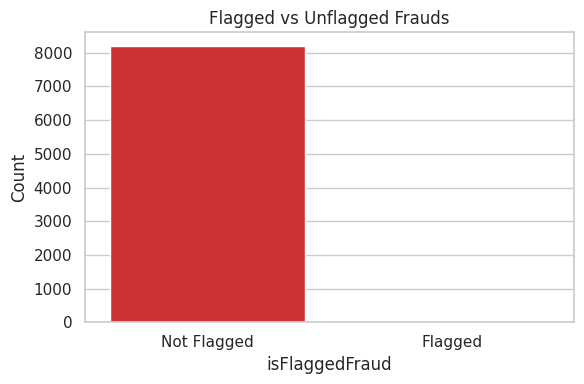

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(6,4))
sns.countplot(data=fraud_df, x='isFlaggedFraud', palette='Set1')
plt.title('Flagged vs Unflagged Frauds')
plt.xticks([0, 1], ['Not Flagged', 'Flagged'])
plt.xlabel('isFlaggedFraud')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


This highlights a weakness in the automated flagging mechanism — meaning the existing system fails to preemptively flag most frauds. Thus, ML models and additional features like balance changes, time of day, and transaction types become critical for fraud detection.

#### Chart - 10 Top 10 Most Frequent Fraudulent Accounts

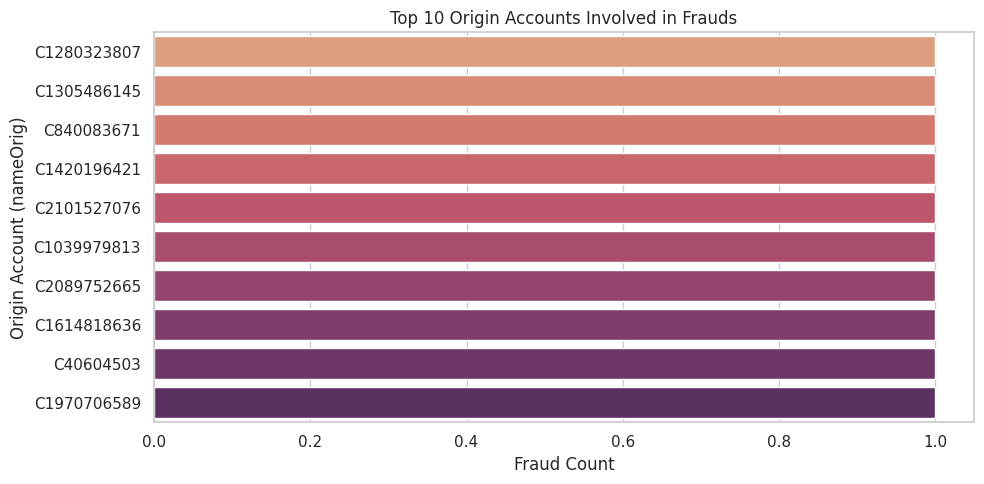

In [ ]:
top_orig = fraud_df['nameOrig'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_orig.values, y=top_orig.index, palette='flare')
plt.title('Top 10 Origin Accounts Involved in Frauds')
plt.xlabel('Fraud Count')
plt.ylabel('Origin Account (nameOrig)')
plt.tight_layout()
plt.show()


#### Chart - 11 What is the distribution of fraud across different time categories (Hour_Category) — like Night, Morning, Evening, etc.?

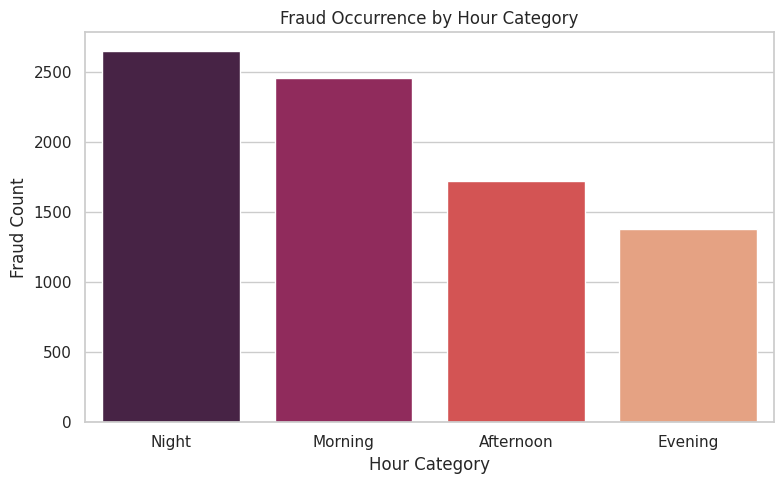

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(8,5))
sns.countplot(data=fraud_df, x='Hour_Category', order=fraud_df['Hour_Category'].value_counts().index, palette='rocket')
plt.title('Fraud Occurrence by Hour Category')
plt.xlabel('Hour Category')
plt.ylabel('Fraud Count')
plt.tight_layout()
plt.show()


Night and Morning have the highest fraud occurrences.
Fraud is less frequent in the Evening and Afternoon.
Fraudsters are more active during night hours, possibly due to reduced monitoring.

## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
df['flag_AmountToBalanceRatio_Orig']=df['AmountToBalanceRatio_Orig'].apply(lambda x : 1 if x >0.9 else 0)


I created **flag_AmountToBalanceRatio_Orig** to identify cases where the transaction amount is almost equal to the origin account's balance. Specifically, I flagged it as 1 when the AmountToBalanceRatio_Orig is greater than 0.9. This is because fraud transactions typically aim to withdraw nearly all funds from an account.

In [ ]:
df['flag_org_balance_change'] = df.apply(lambda row: 1 if row['org_balance_change'] == row['amount'] else 0, axis=1)


I created **flag_org_balance_change** to check if the balance change in the origin account is exactly equal to the transaction amount. If org_balance_change equals the transaction amount, I marked the flag as 1. This indicates that the entire amount was debited from the account, which is a common behavior in fraud scenarios.

In [ ]:
df['flag_dest_balance_change'] = df.apply(lambda row: 1 if row['dest_balance_change'] == row['amount'] else 0, axis=1)

I also created **flag_dest_balance_change** to mark instances where the balance change in the destination account is equal to the transaction amount. This flag is set to 1 when the destination receives the full amount without any deductions, which usually signifies a clean and direct transfer — a pattern observed in fraudulent activities.

#### Dropping all irrelevant columns

In [ ]:

df = df.drop(columns=['step', 'amount', 'nameOrig', 'oldbalanceOrg',
                      'newbalanceOrig', 'nameDest', 'oldbalanceDest',
                      'newbalanceDest', 'Hour_of_day', 'AmountToBalanceRatio_Orig','isFlaggedFraud','org_balance_change','dest_balance_change'])


### 1. Categorical Encoding

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']


df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)

Original shape: (6362620, 8)
Encoded shape: (6362620, 12)


Here, I have used one-hot encoding to handle categorical features.

### 6. Data Scaling

In [ ]:
# 3. Apply Min-Max Scaling to all numeric columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled_array, columns=df_encoded.columns)

print(df_scaled.head())

   isFraud  flag_AmountToBalanceRatio_Orig  flag_org_balance_change  \
0      0.0                             0.0                      0.0   
1      0.0                             0.0                      0.0   
2      1.0                             1.0                      1.0   
3      1.0                             1.0                      1.0   
4      0.0                             0.0                      0.0   

   flag_dest_balance_change  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0                       0.0            0.0         0.0           1.0   
1                       0.0            0.0         0.0           1.0   
2                       0.0            0.0         0.0           0.0   
3                       0.0            1.0         0.0           0.0   
4                       0.0            0.0         0.0           1.0   

   type_TRANSFER  Dest_Type_M  Hour_Category_Evening  Hour_Category_Morning  \
0            0.0          1.0                    0.0         

Here, I have used Min-Max Scaler to scale my numerical features

### 9. Handling Imbalanced Dataset

<Axes: xlabel='isFraud', ylabel='count'>

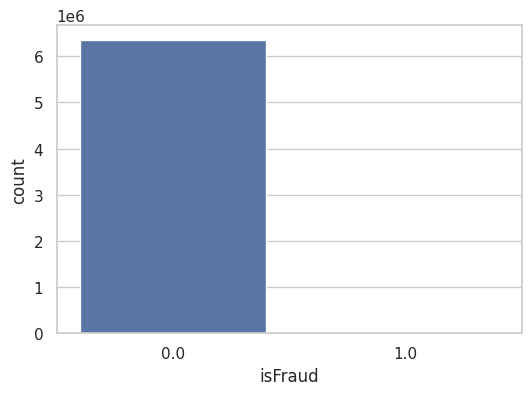

In [ ]:
#this dataset is imbalance
plt.figure(figsize=(6, 4))
sns.countplot(data=df_scaled,x='isFraud')

The categories in the target feature are not proportionately represented, which can lead the model to make incorrect predictions and become biased towards the majority class. Therefore, To Handle this inbalanced dataset i use a Famous Technique called SMOTE stands for synthetic minority oversampling technique, this technique only focuses on minority class , it tried to create new minority sample from the nearest samples using Knn technique.

In [ ]:
# SMOTE

from imblearn.over_sampling import SMOTE

X = df_scaled.drop('isFraud', axis=1)
y = df_scaled['isFraud']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                      pd.Series(y_resampled, name='isFraud')], axis=1)

# Check class distribution
print("After SMOTE:")
print(y_resampled.value_counts())

After SMOTE:
isFraud
0.0    6354407
1.0    6354407
Name: count, dtype: int64


#### Comparison of Class Distribution Before and After SMOTE

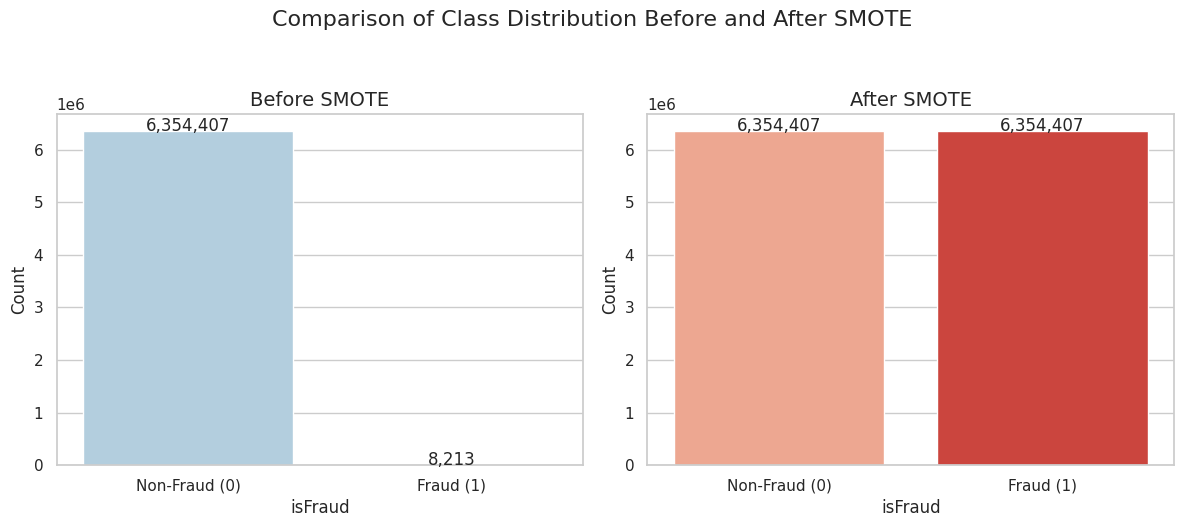

In [ ]:

# Set Seaborn style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ----------------------
# Plot 1: Before SMOTE
# ----------------------
sns.barplot(
    x=df['isFraud'].value_counts().index,
    y=df['isFraud'].value_counts().values,
    ax=axes[0],
    palette='Blues'
)
axes[0].set_title("Before SMOTE", fontsize=14)
axes[0].set_xlabel("isFraud")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
for i, v in enumerate(df['isFraud'].value_counts().values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontsize=12)

# ----------------------
# Plot 2: After SMOTE
# ----------------------
sns.barplot(
    x=pd.Series(y_resampled).value_counts().index,
    y=pd.Series(y_resampled).value_counts().values,
    ax=axes[1],
    palette='Reds'
)
axes[1].set_title("After SMOTE", fontsize=14)
axes[1].set_xlabel("isFraud")
axes[1].set_ylabel("Count")
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
for i, v in enumerate(pd.Series(y_resampled).value_counts().values):
    axes[1].text(i, v + 500, f'{v:,}', ha='center', fontsize=12)

# Final layout
plt.suptitle("Comparison of Class Distribution Before and After SMOTE", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


### 4. Feature Manipulation & Selection

#### 1. Feature selection using lasso regression

Lasso regression prevents overfitting by adding a penalty term, α, to the error function. In logistic regression, this function typically uses the logarithm of the likelihood.

One of the key benefits of Lasso regression is its capability for feature selection. By increasing the value of α, less important features have their corresponding coefficients shrink towards zero or become exactly zero. This regularization process promotes sparsity in the model, effectively excluding irrelevant features. As a result, the remaining non-zero coefficients indicate the most important features for predicting the target variable.

Here, i have used feature selection property of lasso regression

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

def lasso_feature_selection(X, y, alpha_list):
    feature_names = X.columns
    selection_table = []

    for alpha in alpha_list:
        lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
        lasso.fit(X, y)

        selection_table.append(lasso.coef_)

    return pd.DataFrame(selection_table, columns=feature_names, index=alpha_list).rename_axis('Alpha')


In [ ]:
# Example alpha values
alphas = [0.0001, 0.001, 0.01, 0.1]

# Run the feature selection
selection_table = lasso_feature_selection(X_resampled, y_resampled, alphas)



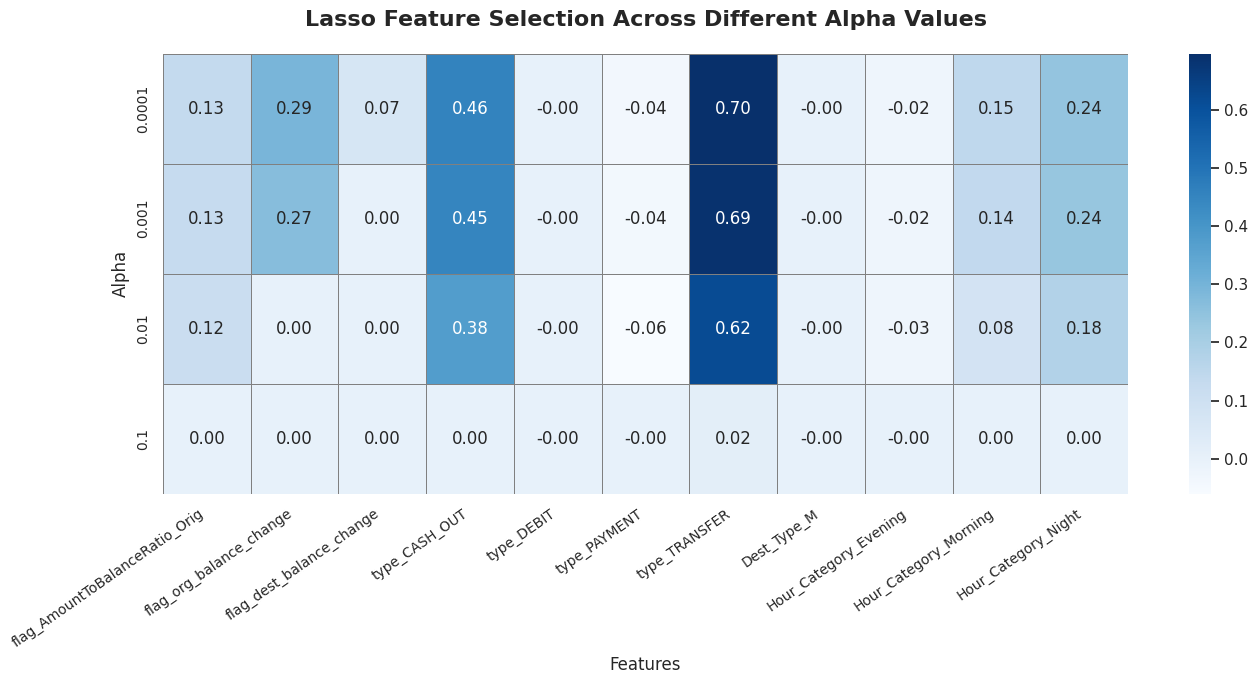

In [ ]:
plt.figure(figsize=(14, 7))
sns.set(font_scale=1.0)

sns.heatmap(
    selection_table,
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='.2f',  # <--- updated here for floats
    annot_kws={"size": 12},
    square=False
)

plt.title("Lasso Feature Selection Across Different Alpha Values", fontsize=16, weight='bold', pad=20)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Alpha", fontsize=12)
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Almost all the features are important for model building.

### 8. Data Splitting

#### PROBLEM THAT I HAVE GOT DURING MODEL BUILDING




Since this dataset contains over 6 million rows, it is very hard for my processor to handle it. Therefore, I have taken a sample of the population for further processing.

In [ ]:
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X_resampled.columns), pd.DataFrame(y_resampled, columns=['isFraud'])], axis=1)

In [ ]:
balanced_df=balanced_df.sample(500000)

In [ ]:
X_resampled=balanced_df.drop(columns='isFraud')
y_resampled=balanced_df['isFraud']

In [ ]:

X_train, X_val, Y_train, Y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, stratify=Y_train, random_state=42)

In [ ]:
print("X_train ",X_train.shape)
print("Y_train ",Y_train.shape)

print("X_val ",X_val.shape)
print("Y_val ",Y_val.shape)

print("X_test ",X_test.shape)
print("Y_test ",Y_test.shape)

X_train  (360000, 11)
Y_train  (360000,)
X_val  (100000, 11)
Y_val  (100000,)
X_test  (40000, 11)
Y_test  (40000,)


I have split my dataset into three parts: Training set, Validation set, and Testing set, with a splitting ratio of 70:20:10. Now, I am going to train my model using the Training set and then check its performance using the Validation set. After that, I will perform hyperparameter tuning using the Validation set to find the best parameters. Once I find the best parameters, I will retrain my model using the Training set with these optimal parameters and evaluate its performance using evaluation metrics. Finally, I will test how my model performs on the unseen Testing set, which will give me an unbiased assessment of its performance.

## ***7. ML Model Implementation***

#### **HyperParameter tuning**

**I have used two techniques for Hyperparamter Tuning**

1. HalvingRandomSearchCV
2. RandomizedSearchCV


In [ ]:
#hyperparamter tuning techniques

import time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


def Hyperparameter_tuning(model,X_train,Y_train,param_grid,tuning_model):
  start=time.time()
  if tuning_model=='RandomizedSearchCV':
    n_iter=int(input("n_iter :"))
    cv=int(input("Cv :"))
    rf_grid=RandomizedSearchCV(
        estimator=model,param_distributions=param_grid,n_iter=n_iter,n_jobs=-1,cv=cv, verbose=1,scoring='accuracy', random_state=42
    )

    try:
      rf_grid.fit(X_train, Y_train)
      return f"""Best parameters by RandomizedSearchCV: {rf_grid.best_params_},
      Best cross-validation score: {rf_grid.best_score_}
      execution time : {round(time.time()-start)} sec
      """

    except Exception as e:
        return f"An error occurred: {e}"
  else:
    start=time.time()
    hr_grid=HalvingRandomSearchCV(
        estimator=model,param_distributions=param_grid,cv=3,n_jobs=-1,factor=3,verbose=1,scoring='accuracy'
    )
    try:
      hr_grid.fit(X_train, Y_train)
      return f"""
      Best parameters by HalvingRandomSearchCV: {hr_grid.best_params_},
      Best cross-validation score: {hr_grid.best_score_}
      execution time : {round(time.time()-start)} sec
      """
    except Exception as e:
        return f"An error occurred: {e}"


#### **ROC curve**

In [ ]:

def visualise(model_object, X_test, Y_test):
    Y_pred = model_object.predict(X_test)
    y_probs = model_object.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
    roc_auc = roc_auc_score(Y_test, y_probs)

    # Create subplots
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Plot ROC Curve
    ax[0].plot(fpr, tpr, color='red', lw=2, linestyle='--', label='ROC curve (area = %0.2f)' % roc_auc)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver Operating Characteristic (ROC)')
    ax[0].legend(loc="lower right")

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    labels = np.array([['True Neg: {}\n({:.2f}%)'.format(conf_matrix[0, 0], conf_matrix_normalized[0, 0] * 100),
                        'False Pos: {}\n({:.2f}%)'.format(conf_matrix[0, 1], conf_matrix_normalized[0, 1] * 100)],
                       ['False Neg: {}\n({:.2f}%)'.format(conf_matrix[1, 0], conf_matrix_normalized[1, 0] * 100),
                        'True Pos: {}\n({:.2f}%)'.format(conf_matrix[1, 1], conf_matrix_normalized[1, 1] * 100)]])

    sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[1])
    ax[1].set_xlabel('Predicted Labels')
    ax[1].set_ylabel('True Labels')
    ax[1].set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()


####**Evaluation Metrics**

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve
)


In [ ]:
def Evaluation_Metrics(model_object, X_test, Y_test):
    # Ensure Y_test is numeric
    Y_test = np.array(Y_test, dtype=int)

    # Predictions
    Y_pred = model_object.predict(X_test)
    y_probs = model_object.predict_proba(X_test)[:, 1]

    # Ensure Y_pred is numeric
    Y_pred = np.array(Y_pred, dtype=int)

    # Compute metrics
    mat = {
        'Accuracy Score': accuracy_score(Y_test, Y_pred),
        'Recall Score': recall_score(Y_test, Y_pred),
        'Precision Score': precision_score(Y_test, Y_pred),
        'F1 Score': f1_score(Y_test, Y_pred),
        'ROC AUC Score': roc_auc_score(Y_test, y_probs)
    }

    mat_df = pd.DataFrame.from_dict(mat, orient='index', columns=['Score'])

    return visualise(model_object, X_test, Y_test), mat_df


### ML Model - 1 Logistic Regression

In [ ]:
L=LogisticRegression()
L.fit(X_train,Y_train)

LogisticRegression()

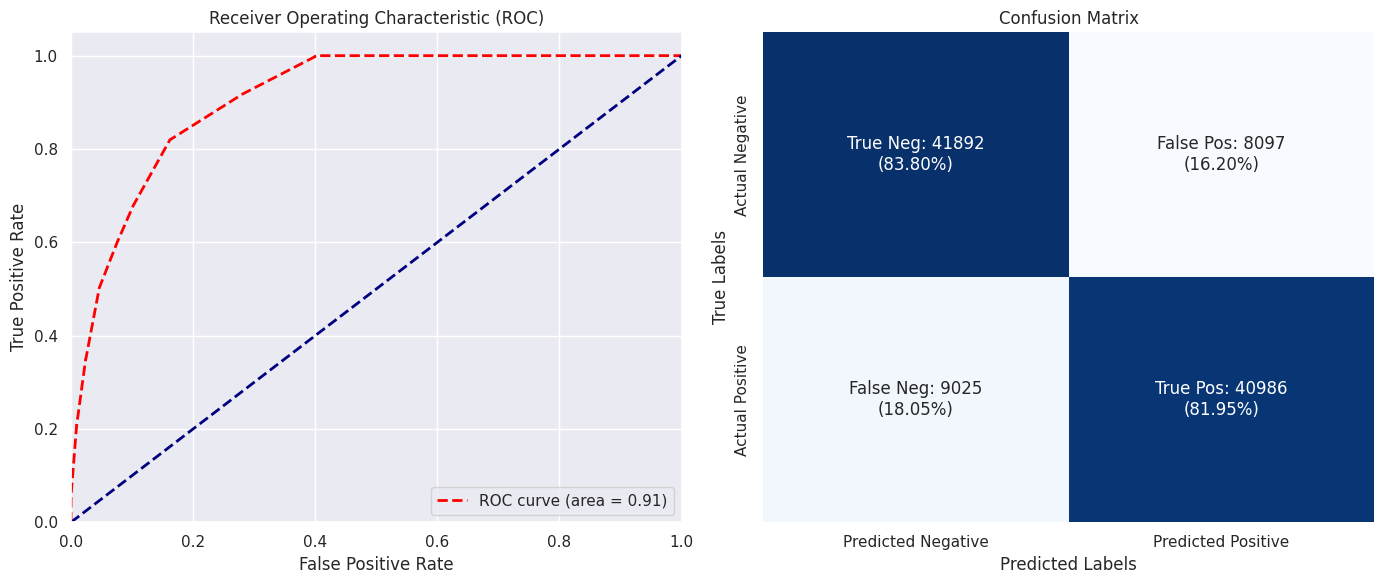

(None,                     Score
Accuracy Score   0.828780
Recall Score     0.819540
Precision Score  0.835035
F1 Score         0.827215
ROC AUC Score    0.910145)


In [ ]:
#Evaluation Metrix
print(Evaluation_Metrics(L, X_val, Y_val))

#### **1. Cross- Validation & Hyperparameter Tuning**

**Hyperparameters in Logistic Reggression**

1. **Regularization Parameter (C)**: This parameter controls the strength of regularization. If the value of C is very low, it means strong regularization. If the value of C is high, it means weak regularization.

2. **Penalty**:  Determines the type of regularization to apply: Lasso regression (L1), Ridge regression (L2), or Elastic Net (a combination of L1 and L2).



In [ ]:

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10, 40, 100],
    'solver': ['saga'],  # 'saga' supports 'l1', 'l2', and 'elasticnet'
    'l1_ratio': [0.1, 0.5, 0.9]  # Only required if using 'elasticnet'
}
print(Hyperparameter_tuning(L,X_val,Y_val,param_grid,'HalvingRandomSearchCV'))
# print(Hyperparameter_tuning(L,X_val,Y_val,param_grid,'RandomizedSearchCV'))


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 9
min_resources_: 12
max_resources_: 100000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 45
n_resources: 12
Fitting 3 folds for each of 45 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 15
n_resources: 36
Fitting 3 folds for each of 15 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 5
n_resources: 108
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 2
n_resources: 324
Fitting 3 folds for each of 2 candidates, totalling 6 fits

      Best parameters by HalvingRandomSearchCV: {'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.1, 'C': 100},
      Best cross-validation score: 0.816862812968732
      execution time : 13 sec
      


In [ ]:
#Train the model with the best paramters
#n_iter=30 and cv=5
La=LogisticRegression(
    solver= 'saga', penalty= 'elasticnet', l1_ratio= 0.1, C= 100
)
La.fit(X_train,Y_train)

LogisticRegression(C=1, l1_ratio=0.5, solver='saga')

Evaluation Before Hyperparameter Tuning 


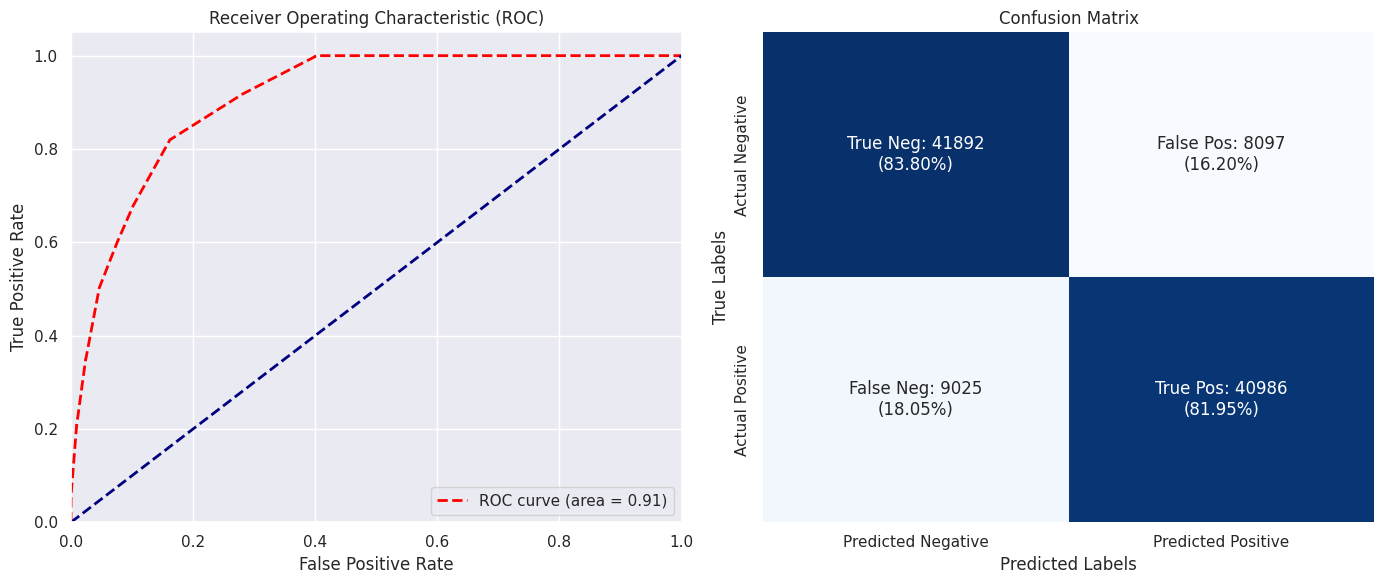

(None,                     Score
Accuracy Score   0.828780
Recall Score     0.819540
Precision Score  0.835035
F1 Score         0.827215
ROC AUC Score    0.910145)
Evaluation after Hyperparameter Tuning 


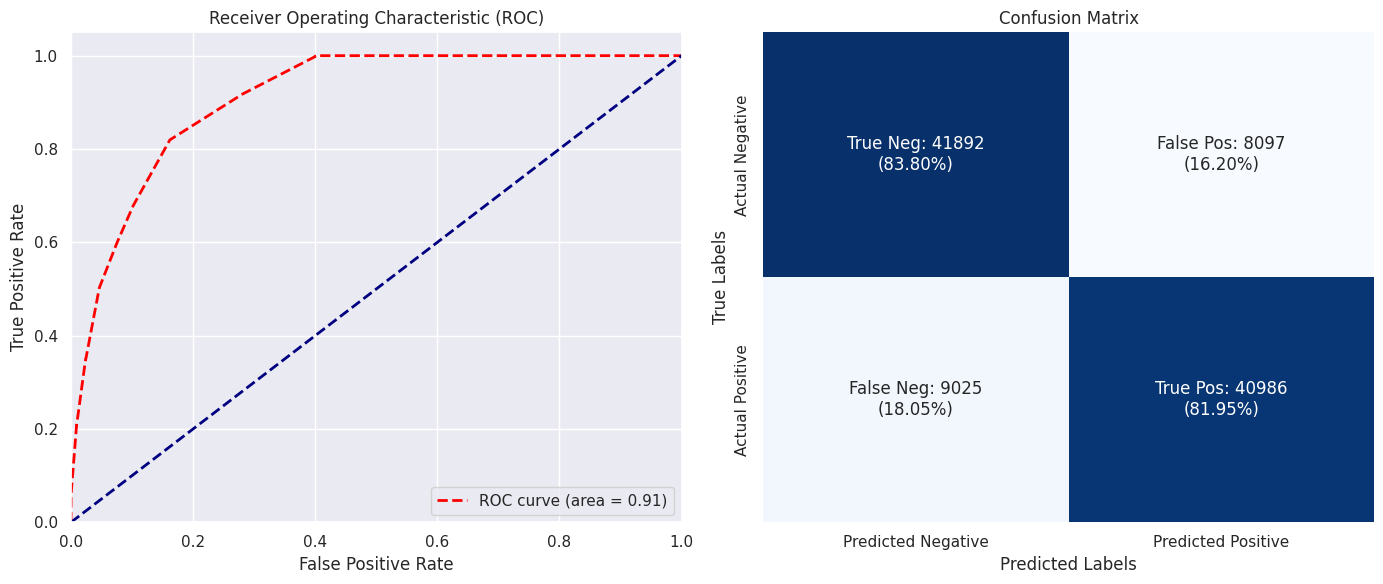

(None,                     Score
Accuracy Score   0.828780
Recall Score     0.819540
Precision Score  0.835035
F1 Score         0.827215
ROC AUC Score    0.910172)
Evaluating the model's performance on an unseen dataset.


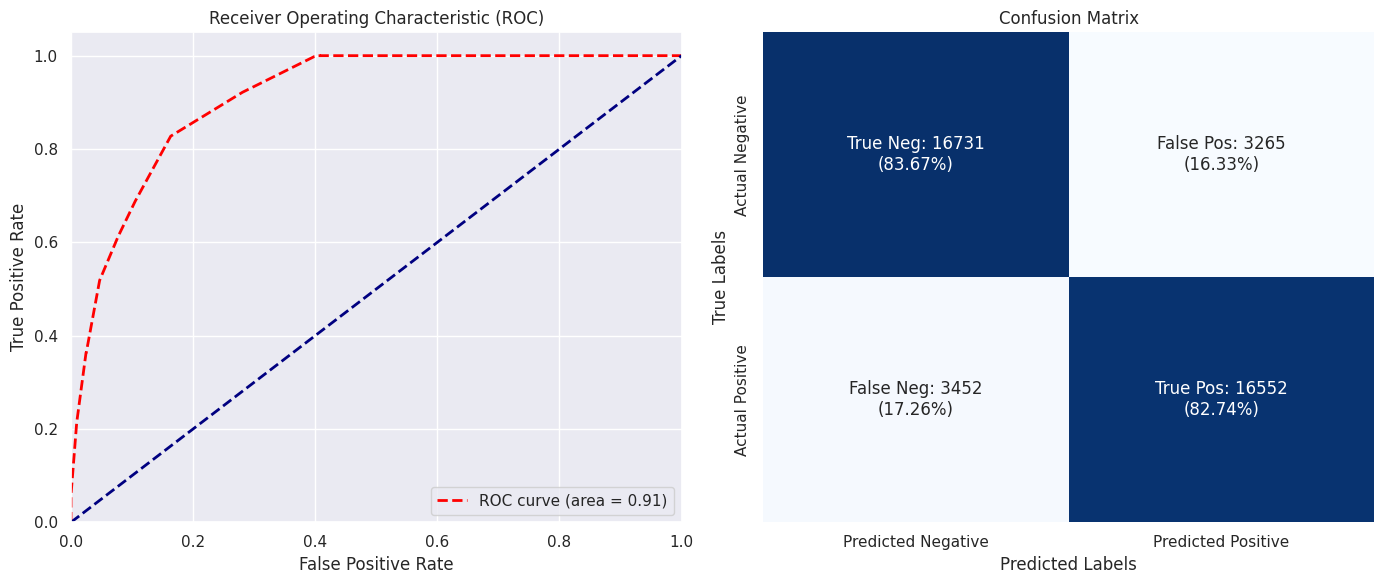

(None,                     Score
Accuracy Score   0.832075
Recall Score     0.827435
Precision Score  0.835242
F1 Score         0.831320
ROC AUC Score    0.912063)


In [ ]:
#Evaluation Metrix
#Evaluation metrics and Roc_curve

print("Evaluation Before Hyperparameter Tuning ")
print(Evaluation_Metrics(L,X_val,Y_val))

print("Evaluation after Hyperparameter Tuning ")
print(Evaluation_Metrics(La,X_val,Y_val))

print("Evaluating the model's performance on an unseen dataset.")
print(Evaluation_Metrics(La,X_test,Y_test))

The final accuracy after hyperparameter tuning is 0.83. Below are the evaluation metrics:"

- Accuracy Score: 0.8321

- Recall Score: 0.8274

- Precision Score: 0.8352

- F1 Score: 0.8313

- ROC AUC Score: 0.9121

### ML Model - 2 Random Forest

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier(n_jobs=-1)
R.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

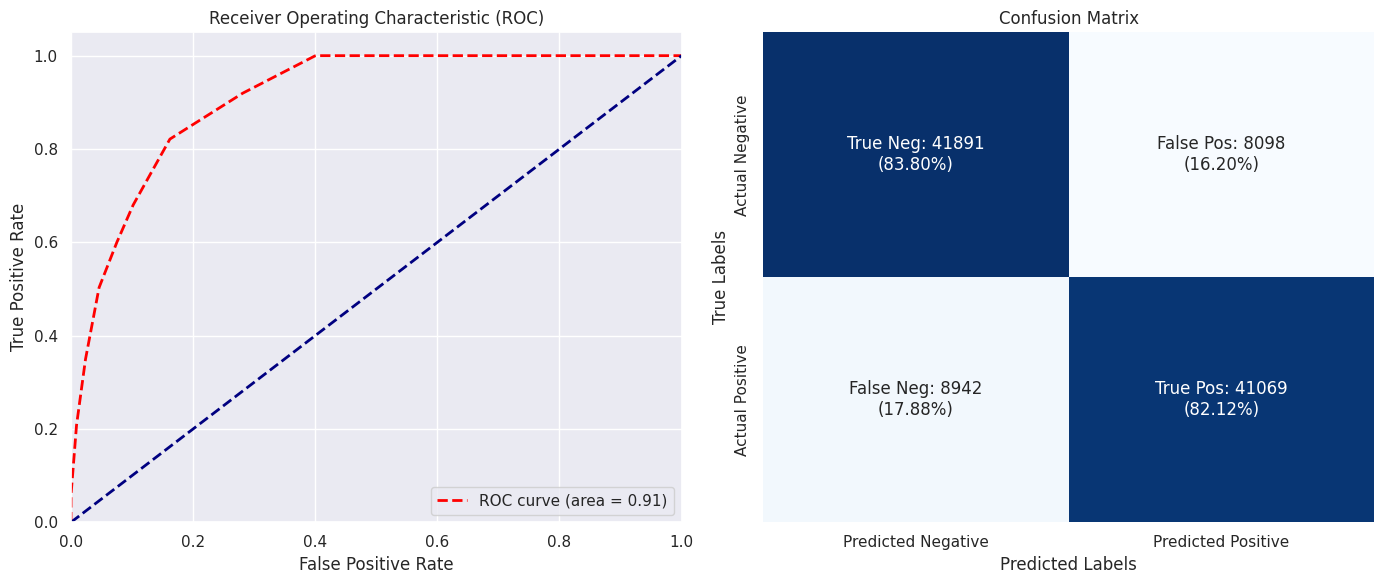

(None,                     Score
Accuracy Score   0.829600
Recall Score     0.821199
Precision Score  0.835296
F1 Score         0.828188
ROC AUC Score    0.910858)


In [ ]:
#Evaluation Metrix
print(Evaluation_Metrics(R, X_val,Y_val))

#### **1. Cross- Validation & Hyperparameter Tuning**

**Hyperparameters in RandomForestClassifier**

1. **n_estimators**: Number of trees in the forest.

2. **max_features**: Maximum number of features each tree is allowed to consider for splitting a node.

3. **max_depth**: Maximum depth of each tree.

4. **min_samples_split**: Minimum number of samples required to split an internal node.

5. **min_samples_leaf**: Minimum number of samples required at a leaf node.

6. **bootstrap**: Whether bootstrap samples are used when building trees.

7. **criterion**: Function to measure the quality of a split (e.g., Gini impurity, entropy).

In [ ]:

param_grid = {
    'n_estimators': [None,150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4],
    'max_features': [ 'sqrt', 'log2'],

}
print(Hyperparameter_tuning(R,X_train,Y_train,param_grid,'HalvingRandomSearchCV'))


n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 10
min_resources_: 12
max_resources_: 360000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 336
n_resources: 12
Fitting 3 folds for each of 336 candidates, totalling 1008 fits
----------
iter: 1
n_candidates: 112
n_resources: 36
Fitting 3 folds for each of 112 candidates, totalling 336 fits
----------
iter: 2
n_candidates: 38
n_resources: 108
Fitting 3 folds for each of 38 candidates, totalling 114 fits
----------
iter: 3
n_candidates: 13
n_resources: 324
Fitting 3 folds for each of 13 candidates, totalling 39 fits
----------
iter: 4
n_candidates: 5
n_resources: 972
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 2
n_resources: 2916
Fitting 3 folds for each of 2 candidates, totalling 6 fits

      Best parameters by HalvingRandomSearchCV: {'n_estimators': 150, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10},
     

In [ ]:
#Train my model with best parameters

Ra=RandomForestClassifier(
    n_estimators=150,min_samples_split=8,min_samples_leaf=4,max_features='log2',max_depth=20
)

Ra.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=4,
                       min_samples_split=8, n_estimators=150)

Evaluation Before Hyperparameter Tuning 


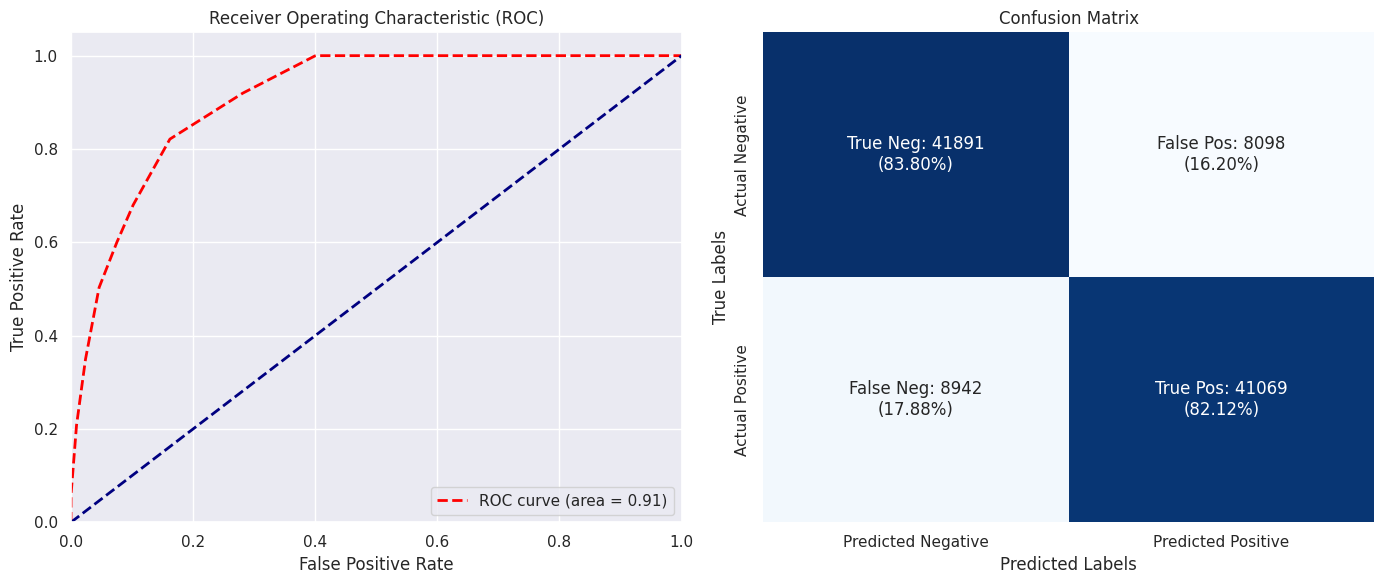

(None,                     Score
Accuracy Score   0.829600
Recall Score     0.821199
Precision Score  0.835296
F1 Score         0.828188
ROC AUC Score    0.910858)
Evaluation after Hyperparameter Tuning 


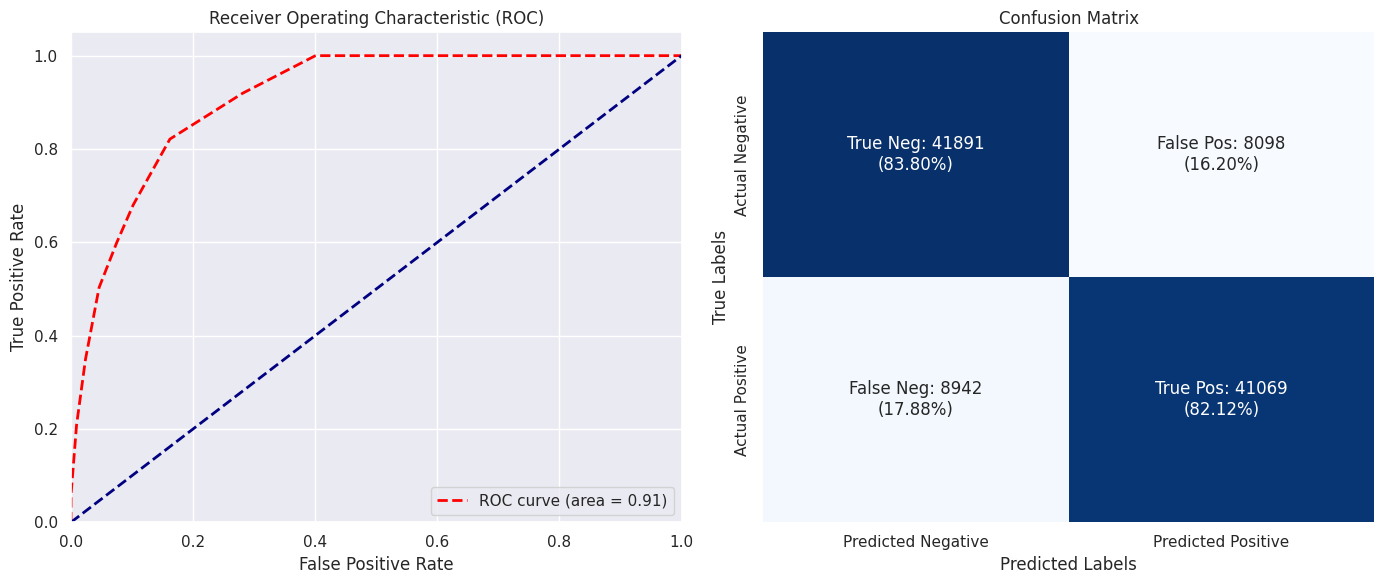

(None,                     Score
Accuracy Score   0.829600
Recall Score     0.821199
Precision Score  0.835296
F1 Score         0.828188
ROC AUC Score    0.910853)
Evaluating the model's performance on an unseen daataset.


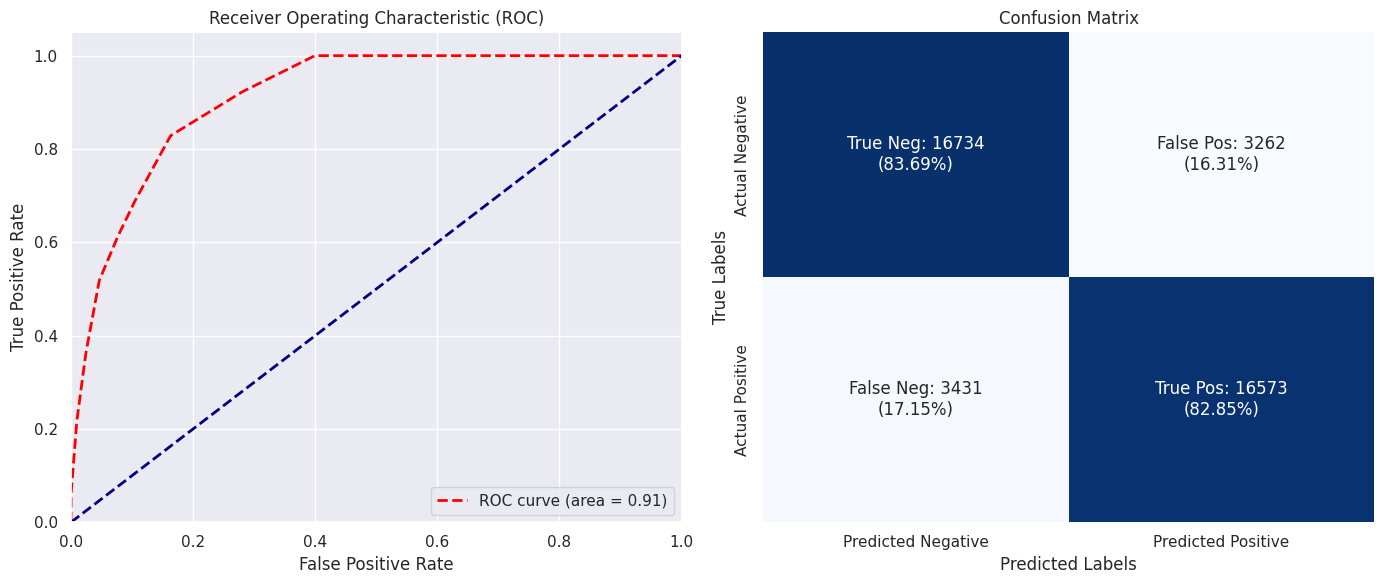

(None,                     Score
Accuracy Score   0.832675
Recall Score     0.828484
Precision Score  0.835543
F1 Score         0.831999
ROC AUC Score    0.912631)


In [ ]:

print("Evaluation Before Hyperparameter Tuning ")
print(Evaluation_Metrics(R,X_val,Y_val))

print("Evaluation after Hyperparameter Tuning ")
print(Evaluation_Metrics(Ra,X_val,Y_val))

print("Evaluating the model's performance on an unseen daataset.")
print(Evaluation_Metrics(Ra,X_test,Y_test))


The final accuracy after hyperparameter tuning is 0.83. Below are the evaluation metrics:"

- Accuracy Score: 0.8326

- Recall Score: 0.8284

- Precision Score: 0.8355

- F1 Score: 0.831

- ROC AUC Score: 0.9126

### ML Model - 3 AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)

# Train on training set
adaboost_model.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

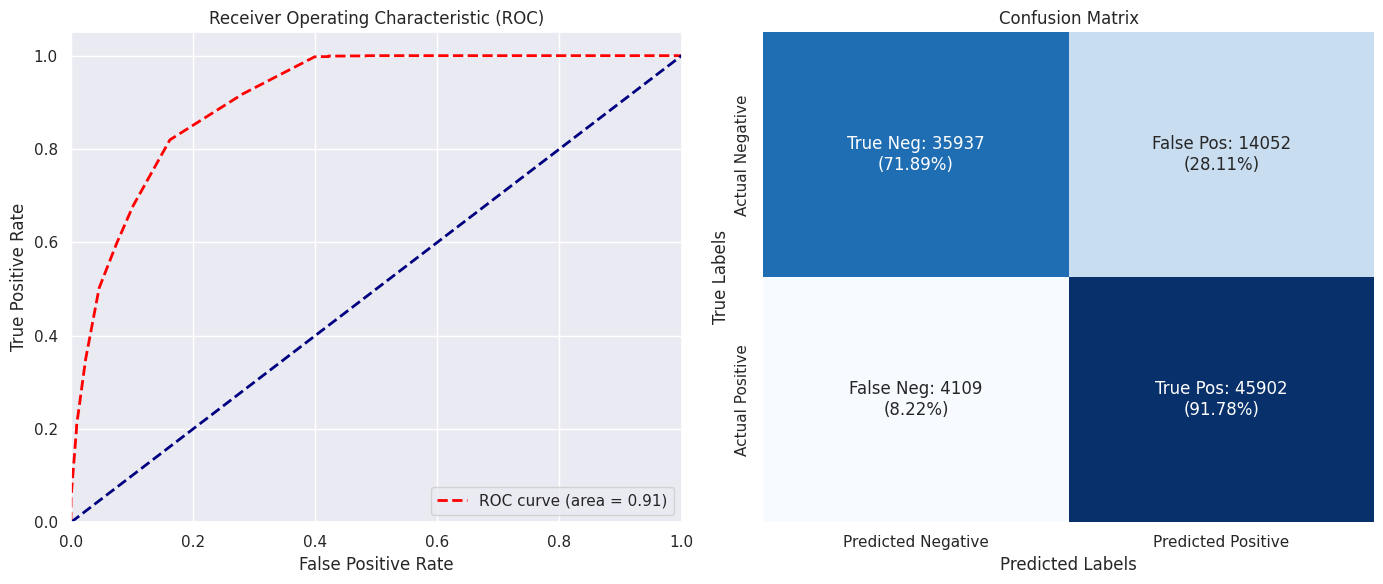

(None,                     Score
Accuracy Score   0.818390
Recall Score     0.917838
Precision Score  0.765620
F1 Score         0.834847
ROC AUC Score    0.910092)


In [ ]:
print(Evaluation_Metrics(adaboost_model, X_val,Y_val))

### ML Model - 4 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
D=DecisionTreeClassifier()
D.fit(X_train,Y_train)

DecisionTreeClassifier()

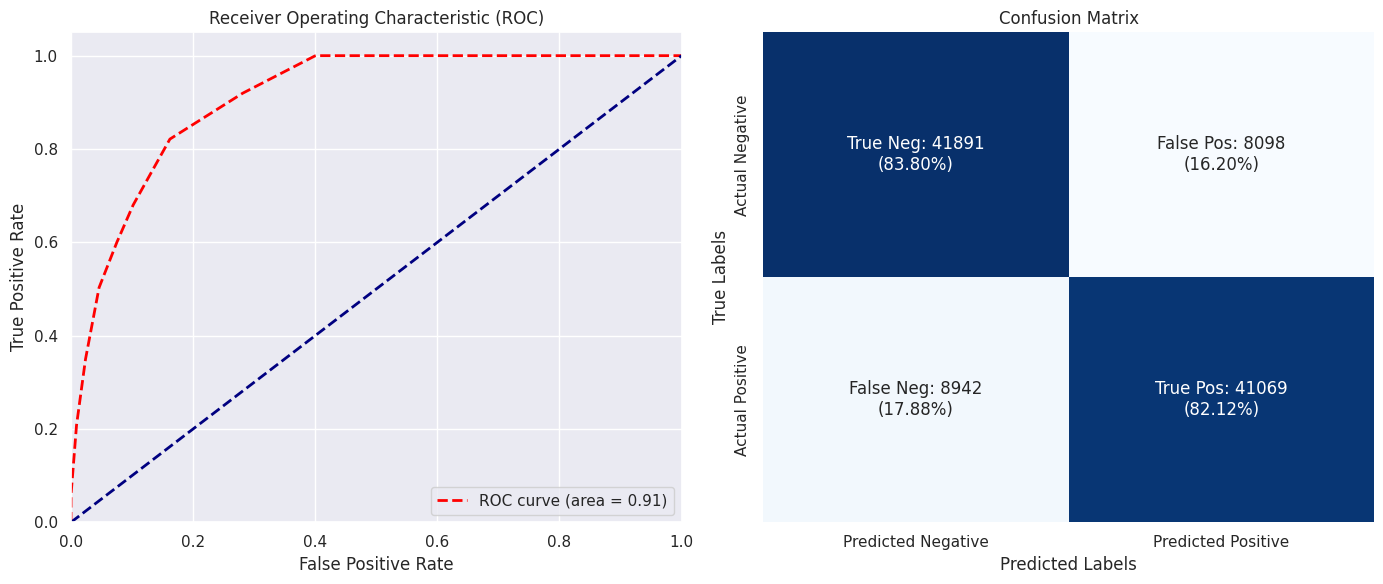

(None,                     Score
Accuracy Score   0.829600
Recall Score     0.821199
Precision Score  0.835296
F1 Score         0.828188
ROC AUC Score    0.910859)


In [ ]:
print(Evaluation_Metrics(D,X_val,Y_val))

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid

param_grid = {"splitter":["best","random"],
              'criterion':['gini', 'entropy', 'log_loss'],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,4,5,7,9,10],
           "min_samples_split":[1,4,7,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,2,3,30,40],
           'random_state':[23]}


# Define the estimator
d = DecisionTreeClassifier()

print(Hyperparameter_tuning(d,X_train,Y_train,param_grid,'HalvingRandomSearchCV'))
# print(Hyperparameter_tuning(d,X_train,Y_train,param_grid,'RandomizedSearchCV'))



n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 10
min_resources_: 12
max_resources_: 360000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 13440
n_resources: 12
Fitting 3 folds for each of 13440 candidates, totalling 40320 fits
----------
iter: 1
n_candidates: 4480
n_resources: 36
Fitting 3 folds for each of 4480 candidates, totalling 13440 fits
----------
iter: 2
n_candidates: 1494
n_resources: 108
Fitting 3 folds for each of 1494 candidates, totalling 4482 fits
----------
iter: 3
n_candidates: 498
n_resources: 324
Fitting 3 folds for each of 498 candidates, totalling 1494 fits
----------
iter: 4
n_candidates: 166
n_resources: 972
Fitting 3 folds for each of 166 candidates, totalling 498 fits
----------
iter: 5
n_candidates: 56
n_resources: 2916
Fitting 3 folds for each of 56 candidates, totalling 168 fits
----------
iter: 6
n_candidates: 19
n_resources: 8748
Fitting 3 folds for each of 19 candidates, totalling 57 fits
----------
iter: 7
n_ca

In [ ]:
#Train the model with the best paramters
#n_iter=30, cv=4
Da=DecisionTreeClassifier(
  splitter= 'best', random_state= 23, min_samples_split= 7,
  min_samples_leaf= 4, max_leaf_nodes= None, max_features= None, max_depth= None, criterion= 'gini'
)
Da.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=7, random_state=23)

Evaluation Before Hyperparameter Tuning 


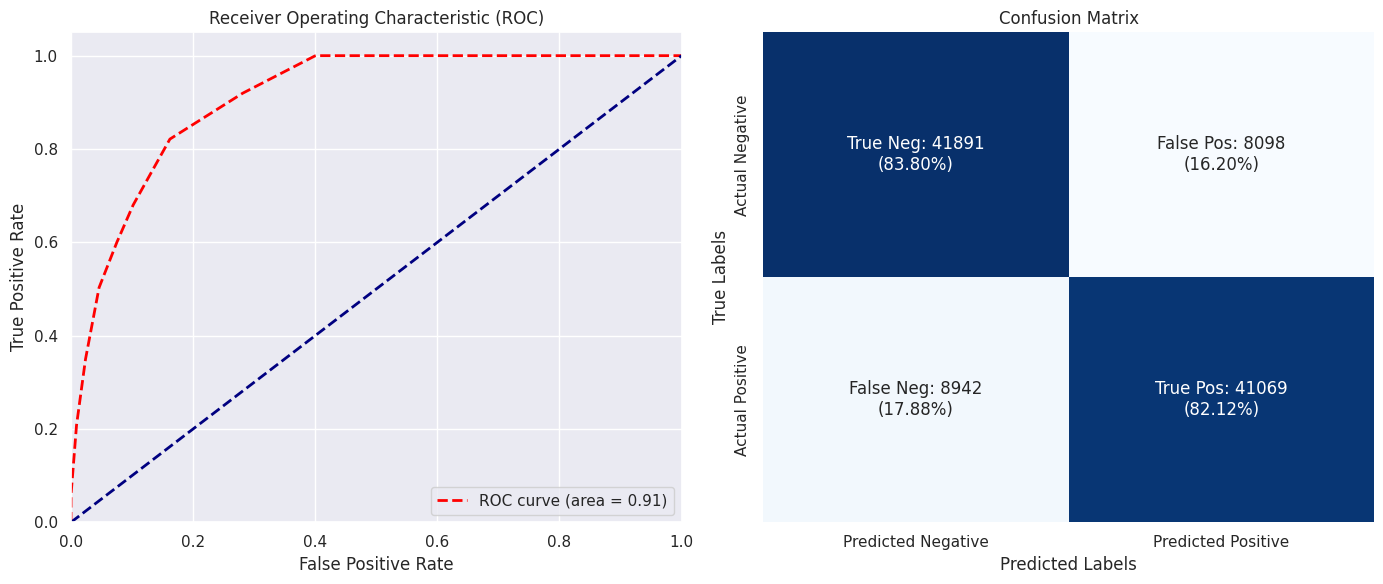

(None,                     Score
Accuracy Score   0.829600
Recall Score     0.821199
Precision Score  0.835296
F1 Score         0.828188
ROC AUC Score    0.910859)
Evaluation after Hyperparameter Tuning 


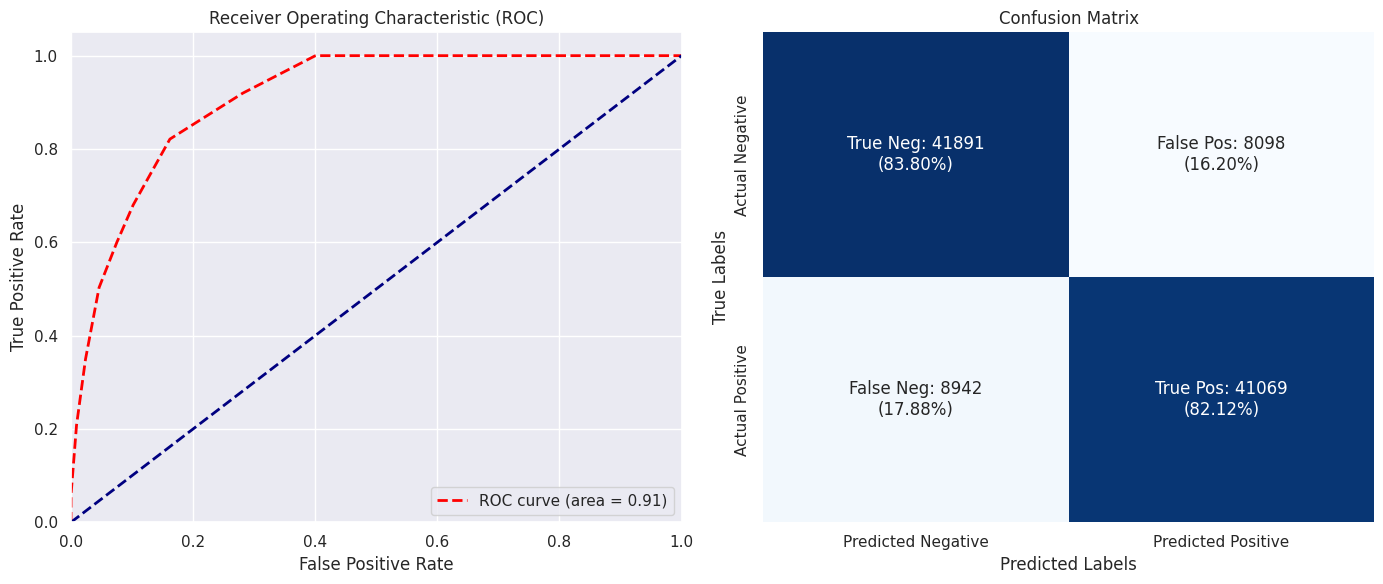

(None,                     Score
Accuracy Score   0.829600
Recall Score     0.821199
Precision Score  0.835296
F1 Score         0.828188
ROC AUC Score    0.910859)
Evaluating the model's performance on an unseen dataset.


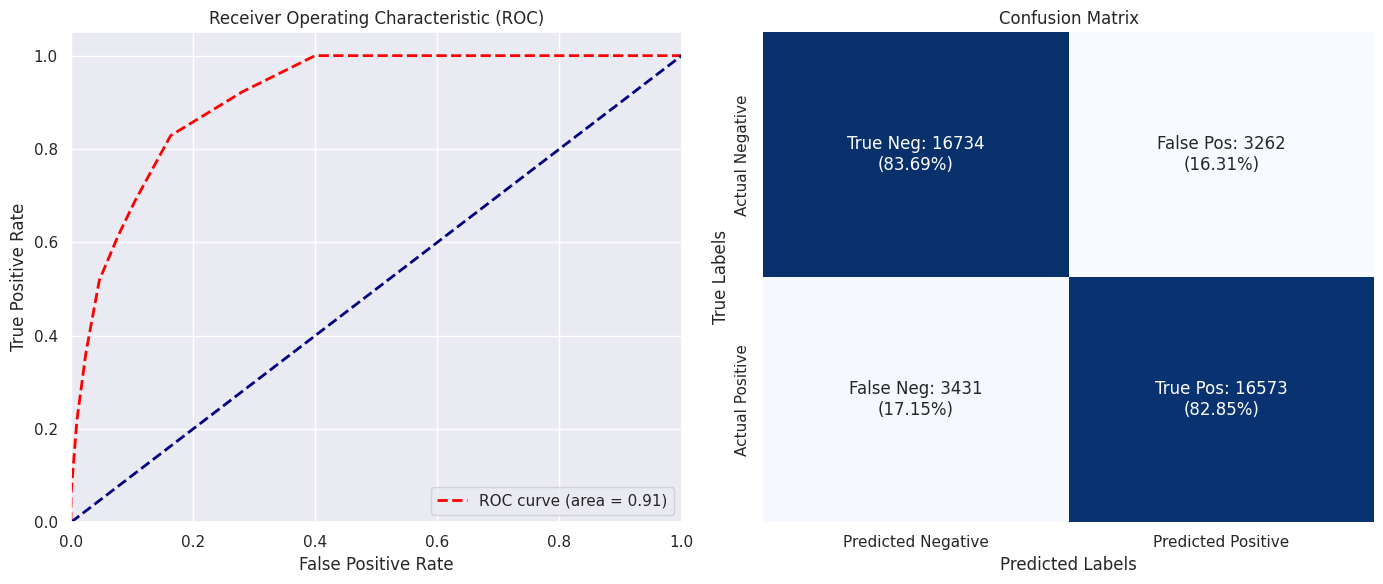

(None,                     Score
Accuracy Score   0.832675
Recall Score     0.828484
Precision Score  0.835543
F1 Score         0.831999
ROC AUC Score    0.912626)


In [ ]:
#Evaluation Metrix
#Evaluation metrics and Roc_curve

print("Evaluation Before Hyperparameter Tuning ")
print(Evaluation_Metrics(D,X_val,Y_val))

print("Evaluation after Hyperparameter Tuning ")
print(Evaluation_Metrics(Da,X_val,Y_val))

print("Evaluating the model's performance on an unseen dataset.")
print(Evaluation_Metrics(Da,X_test,Y_test))


The final accuracy after hyperparameter tuning is 0.83. Below are the evaluation metrics:"

- Accuracy Score: 0.8326

- Recall Score: 0.8284

- Precision Score: 0.8355

- F1 Score: 0.8319

- ROC AUC Score: 0.9126

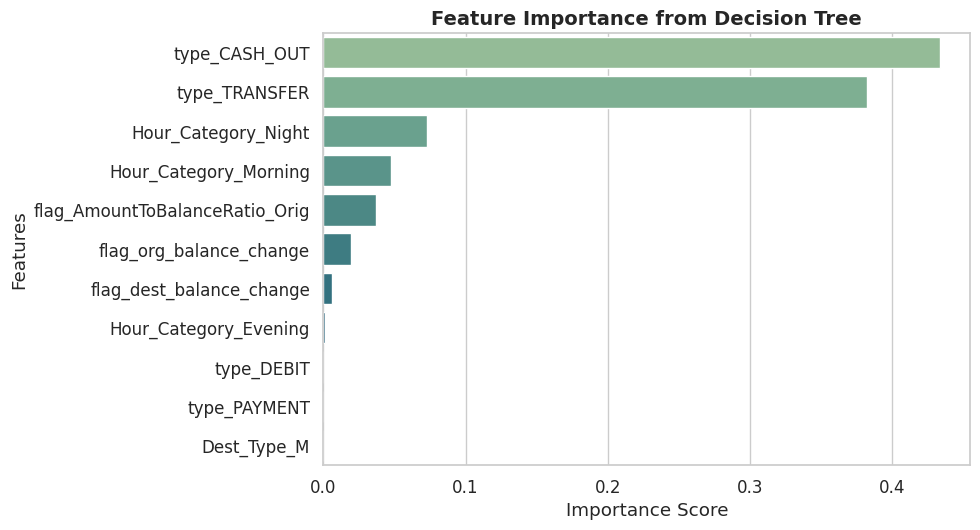

In [ ]:

sorted_importance = importance.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, len(sorted_importance) * 0.5))
sns.set(style="whitegrid", font_scale=1.1)
sns.barplot(x=sorted_importance, y=sorted_importance.index, palette="crest")

plt.title("Feature Importance from Decision Tree", fontsize=14, weight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


It clearly shows that the transaction types, specifically type_CASH_OUT and type_TRANSFER, are the most influential in predicting fraud, with the highest importance scores.

## ***8.*** ***Model Deployment***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


All of the 4 performing well , having almost same accuracy ,so i choose random forest for further deployement process.

In [ ]:

import joblib
joblib.dump(Ra, 'fraud_detection_model.pkl')
joblib.dump(list(X_resampled.columns), 'model_features.pkl')  # Save the model's feature columns


['model_features.pkl']

#### Streamlit App script

In [ ]:
## App script

import streamlit as st
import pandas as pd
import joblib
from datetime import datetime
import base64

# === Page Configuration ===
st.set_page_config(page_title="💳 Fraud Detection App", layout="centered")

# Encode the background image in base64
def get_base64_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode()

encoded_bg = get_base64_image('6367395.jpg')  # replace with your image file path

# Inject Custom CSS for styling
st.markdown(
    f"""
    <style>
    .stApp {{
        background-image: url("data:image/png;base64,{encoded_bg}");
        background-size: cover;
        background-position: center;
        background-repeat: no-repeat;
        background-attachment: fixed;
    }}

    h1, h2, h3, h4, h5, h6, .stMarkdown {{
        font-size: 24px !important;
        color: white !important;
        text-shadow: 1px 1px 3px black;
    }}

    label, .css-1d391kg p, .css-1v0mbdj p, .css-1v0mbdj {{
        font-size: 18px !important;
        color: white !important;
        text-shadow: 1px 1px 3px black;
    }}

    .stButton>button {{
        background-color: #0072B2;
        color: white;
        font-size: 18px;
        border-radius: 8px;
        padding: 0.5em 1.5em;
    }}
    </style>
    """,
    unsafe_allow_html=True
)

# === Load model and features ===
model = joblib.load('fraud_detection_model.pkl')
model_features = joblib.load('model_features.pkl')

# === Title ===
st.title("💳 Fraud Detection Prediction")

st.markdown("Enter the **transaction details** below 👇")

# === User Inputs ===
transaction_type = st.selectbox("Transaction Type", ['TRANSFER', 'CASH_OUT', 'PAYMENT', 'DEBIT', 'CASH_IN'])
amount = st.number_input("Transaction Amount", min_value=0.0, step=0.01)
oldbalanceOrg = st.number_input("Origin Account Balance", min_value=0.0, step=0.01)
current_hour = st.number_input("Transaction Hour of Day (0-23)", min_value=0, max_value=23, value=datetime.now().hour)

# === Backend Calculations ===
newbalanceOrig = max(oldbalanceOrg - amount, 0)
org_balance_change = oldbalanceOrg - newbalanceOrig
amount_to_balance_ratio = round(amount / (oldbalanceOrg + 1), 2)
flag_org_balance_change = 1 if org_balance_change == amount else 0
flag_amount_to_balance_ratio = 1 if amount_to_balance_ratio >= 0.9 else 0

def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

hour_category = categorize_hour(current_hour)

# === Prepare input dataframe ===
input_data = pd.DataFrame({
    'type': [transaction_type],
    'amount': [amount],
    'oldbalanceOrg': [oldbalanceOrg],
    'newbalanceOrig': [newbalanceOrig],
    'org_balance_change': [org_balance_change],
    'AmountToBalanceRatio_Orig': [amount_to_balance_ratio],
    'flag_org_balance_change': [flag_org_balance_change],
    'flag_AmountToBalanceRatio_Orig': [flag_amount_to_balance_ratio],
    'Hour_of_day': [current_hour],
    'Hour_Category': [hour_category]
})

input_data = pd.get_dummies(input_data)

# Ensure all required features are present
for col in model_features:
    if col not in input_data.columns:
        input_data[col] = 0

input_data = input_data[model_features]

# === Prediction Button ===
if st.button("🔎 Predict Fraud"):
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.error(f"⚠️ This transaction is likely **FRAUDULENT** with a probability of **{probability:.2%}**.")
    else:
        st.success(f"✅ This transaction is likely **SAFE**, with a fraud probability of **{probability:.2%}**.")



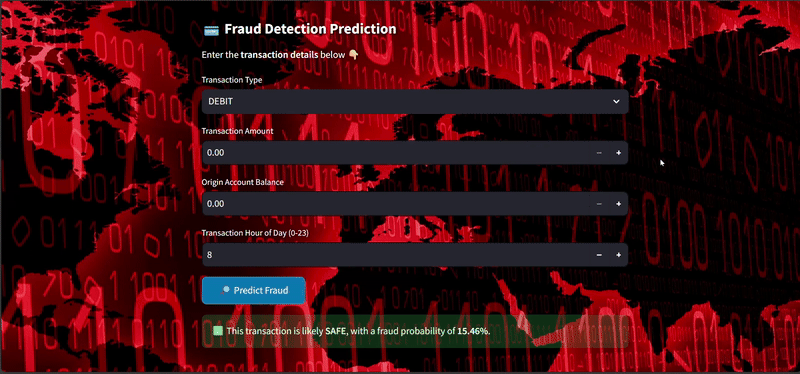

# **Conclusion**

In this project, I developed a comprehensive Fraud Detection System by performing deep exploratory data analysis, feature engineering, and training multiple machine learning models on a large financial transaction dataset.

To handle the sheer volume of data (around 6 lakh rows), I extracted a sample of the population for my analysis and modeling. This was essential due to computational limitations on my processor. This sampling might have slightly impacted the model's generalization, resulting in an achieved accuracy of 83% — which is still promising given the data constraints.

**Summary of Work Done**

Performed thorough EDA revealing that fraudulent transactions are primarily associated with TRANSFER and CASH_OUT transaction types.

Identified that frauds mostly occur via corporate (C) accounts and during night hours.

Engineered key features such as:

- Amount to Balance Ratio
- Origin Balance Change
- Destination Balance Change
- Hour of Day Categorization

**Models Trained**

I trained and evaluated four machine learning models:
- Logistic Regression
- Random Forest Classifier
- AdaBoost Classifier
- Decision Tree Classifier

Among these, models like Logistic Regression and Decision Tree performed well on the sample data, with an accuracy of up to 83%.

**Deployment**

I built an interactive Streamlit web application where users can input transaction details and get real-time fraud predictions, powered by the trained machine learning model. The app also features a custom-designed dark-themed background for better visibility.

**Impact**

This system is designed to help financial institutions:

- Detect fraudulent activities promptly.
- Prevent financial losses.
- Strengthen security protocols based on transaction patterns.